## Persistency of Drug

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_excel('Healthcare_dataset.xlsx', sheet_name='Dataset')

In [3]:
df.sample(5)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
2843,P2844,Non-Persistent,Male,Caucasian,Not Hispanic,Midwest,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,N,N,N,N,N,N,N,1
3013,P3014,Persistent,Female,Caucasian,Not Hispanic,Midwest,55-65,RHEUMATOLOGY,Specialist,Rheum,...,N,N,Y,N,N,N,N,N,N,2
1897,P1898,Non-Persistent,Female,African American,Not Hispanic,Midwest,>75,ORTHOPEDIC SURGERY,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,3
3307,P3308,Non-Persistent,Female,Caucasian,Not Hispanic,South,>75,UROLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,Y,N,N,N,N,Y,3
223,P224,Persistent,Female,Caucasian,Not Hispanic,South,>75,RHEUMATOLOGY,Specialist,Rheum,...,N,N,N,N,N,N,N,N,N,0


In [4]:
df.shape

(3424, 69)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [8]:
df.corr(numeric_only=True)

,Dexa_Freq_During_Rx,Count_Of_Risks
Dexa_Freq_During_Rx,1.000000,0.013964
Count_Of_Risks,0.013964,1.000000


In [9]:
df.drop(columns=['Ptid'],inplace=True)

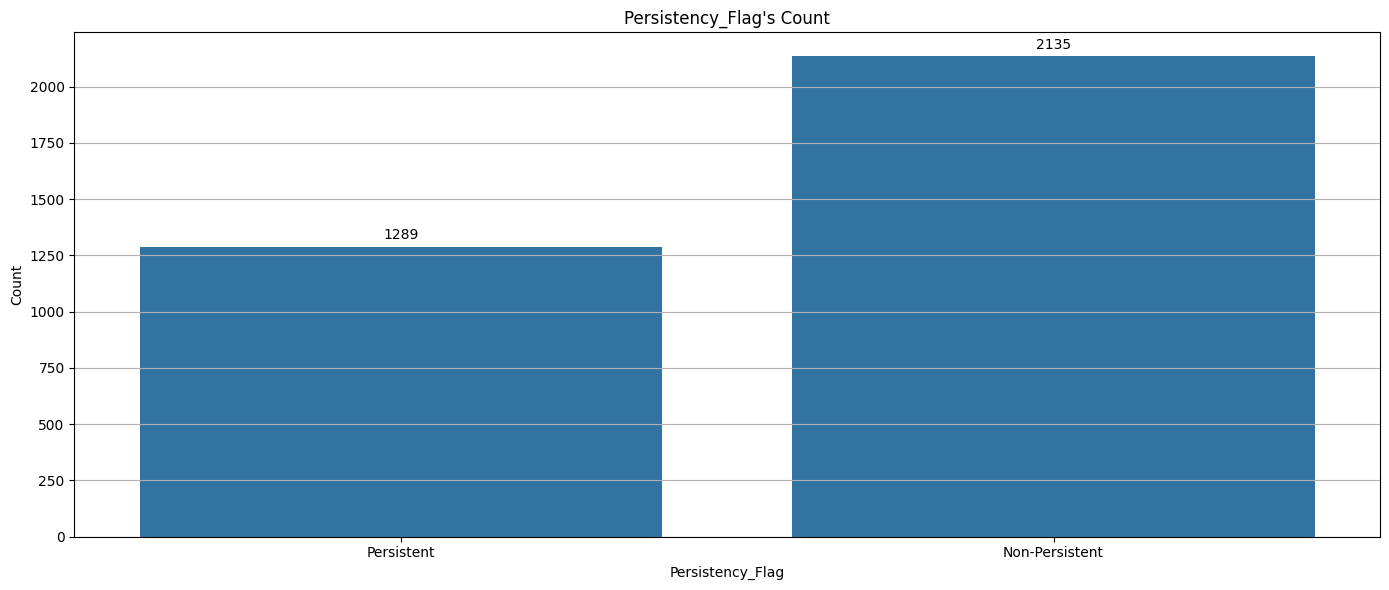

In [10]:
plt.figure(figsize=(14,6))
plt.title("Persistency_Flag's Count")
count = sns.countplot(data=df, x='Persistency_Flag')
plt.ylabel("Count")
plt.grid(axis='y')
plt.xlabel("Persistency_Flag")

for container in count.containers:
    count.bar_label(container, fmt='%.0f',label_type='edge',padding=3)

plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)

Comprehensive analysis to understand the data patterns, distributions, and relationships between variables that affect drug persistency in healthcare patients.

### 1. Basic Dataset Overview

In [11]:
# Dataset Overview
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")
print(f"\nData types:")
print(df.dtypes.value_counts())
print(f"\nColumn names:")
print(list(df.columns))

=== DATASET OVERVIEW ===
Dataset shape: (3424, 68)
Memory usage: 11.23 MB

Data types:
object    66
int64      2
Name: count, dtype: int64

Column names:
['Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug

In [12]:
# Statistical Summary
print("=== STATISTICAL SUMMARY ===")
print("\nNumerical variables summary:")
print(df.select_dtypes(include=[np.number]).describe())

print("\nCategorical variables summary:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\n{col}:")
    print(df[col].value_counts().head())

=== STATISTICAL SUMMARY ===

Numerical variables summary:
       Dexa_Freq_During_Rx  Count_Of_Risks
count          3424.000000     3424.000000
mean              3.016063        1.239486
std               8.136545        1.094914
min               0.000000        0.000000
25%               0.000000        0.000000
50%               0.000000        1.000000
75%               3.000000        2.000000
max             146.000000        7.000000

Categorical variables summary:

Persistency_Flag:
Persistency_Flag
Non-Persistent    2135
Persistent        1289
Name: count, dtype: int64

Gender:
Gender
Female    3230
Male       194
Name: count, dtype: int64

Race:
Race
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: count, dtype: int64

Ethnicity:
Ethnicity
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: count, dtype: int64

Region:
Region
Midwest          1383
South            1247
West              502
Northeast   

### 2. Target Variable Analysis

C:\Users\keval\AppData\Local\Temp\ipykernel_1576\3154470821.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Persistency_Flag', ax=ax2, palette='Set2')


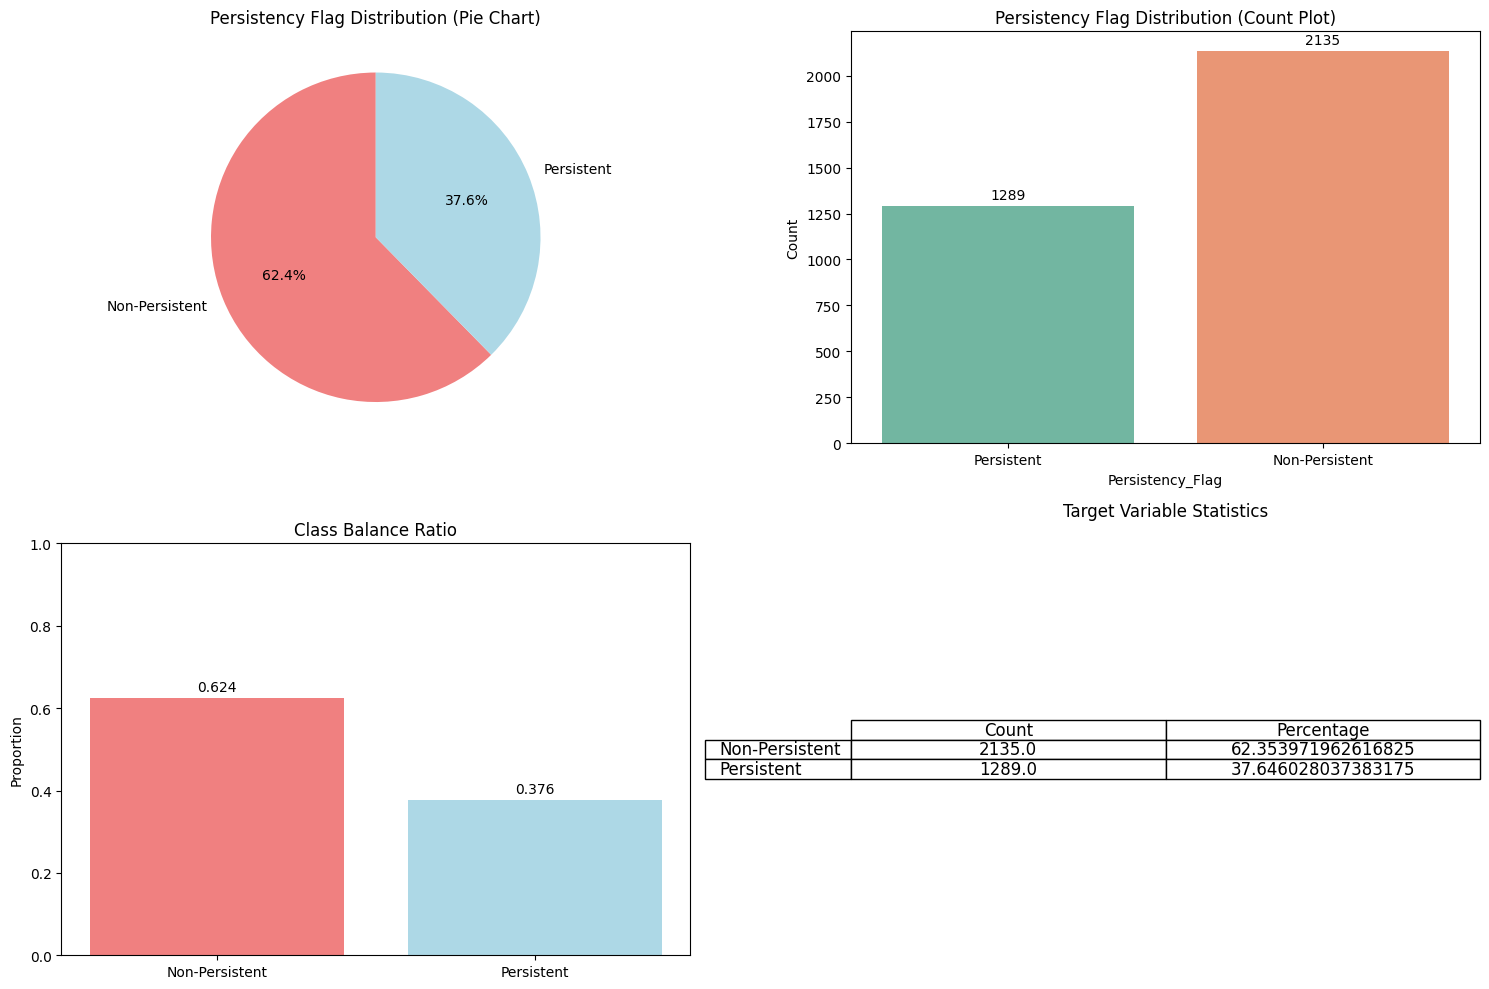

Target Variable Analysis:
Total samples: 3424
Class distribution:
  Non-Persistent: 2135 (62.35%)
  Persistent: 1289 (37.65%)


In [13]:
# Enhanced Target Variable Analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of target variable
persistency_counts = df['Persistency_Flag'].value_counts()
ax1.pie(persistency_counts.values, labels=persistency_counts.index, autopct='%1.1f%%', 
        colors=['lightcoral', 'lightblue'], startangle=90)
ax1.set_title('Persistency Flag Distribution (Pie Chart)')

# Bar chart
sns.countplot(data=df, x='Persistency_Flag', ax=ax2, palette='Set2')
ax2.set_title('Persistency Flag Distribution (Count Plot)')
ax2.set_ylabel('Count')
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Class imbalance ratio
persistency_ratio = df['Persistency_Flag'].value_counts(normalize=True)
ax3.bar(persistency_ratio.index, persistency_ratio.values, color=['lightcoral', 'lightblue'])
ax3.set_title('Class Balance Ratio')
ax3.set_ylabel('Proportion')
ax3.set_ylim(0, 1)
for i, v in enumerate(persistency_ratio.values):
    ax3.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Target statistics
target_stats = pd.DataFrame({
    'Count': persistency_counts,
    'Percentage': persistency_counts / len(df) * 100
})
ax4.axis('tight')
ax4.axis('off')
table = ax4.table(cellText=target_stats.values, 
                  rowLabels=target_stats.index,
                  colLabels=target_stats.columns,
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
ax4.set_title('Target Variable Statistics', pad=20)

plt.tight_layout()
plt.show()

print(f"Target Variable Analysis:")
print(f"Total samples: {len(df)}")
print(f"Class distribution:")
for label, count in persistency_counts.items():
    print(f"  {label}: {count} ({count/len(df)*100:.2f}%)")

### 3. Numerical Features Analysis

Numerical columns (2): ['Dexa_Freq_During_Rx', 'Count_Of_Risks']


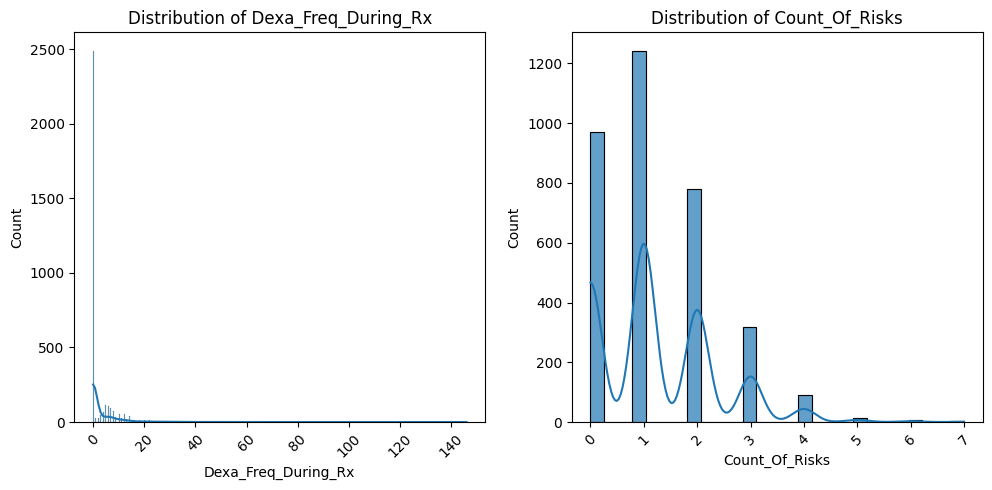

In [14]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

# Distribution plots for numerical variables
if len(numerical_cols) > 0:
    n_cols = 3
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    
    # Handle different subplot configurations
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
    else:
        axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            sns.histplot(data=df, x=col, kde=True, ax=axes[i], alpha=0.7)
            axes[i].set_title(f'Distribution of {col}')
            axes[i].tick_params(axis='x', rotation=45)

    # Hide empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found in the dataset.")

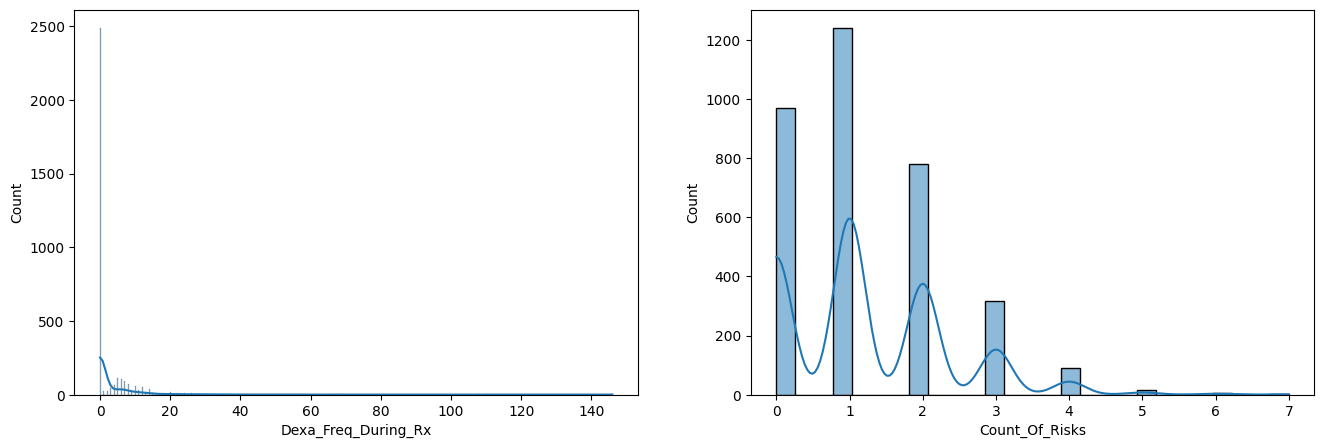

In [15]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['Dexa_Freq_During_Rx'], kde='True')

plt.subplot(1,2,2)
sns.histplot(df['Count_Of_Risks'],kde='True')

plt.show()

In [16]:
df['Count_Of_Risks'].skew(), df['Dexa_Freq_During_Rx'].skew()

(np.float64(0.8797905232898707), np.float64(6.8087302112992285))

In [17]:
print('Mean :', df['Dexa_Freq_During_Rx'].mean())
print('Std :', df['Dexa_Freq_During_Rx'].std())
print('Min :', df['Dexa_Freq_During_Rx'].min())
print('Max :', df['Dexa_Freq_During_Rx'].max())

Mean : 3.0160630841121496
Std : 8.136544994975786
Min : 0
Max : 146


In [4]:
#Boundary

Highest_allowed = df['Dexa_Freq_During_Rx'].mean()+ 3*df['Dexa_Freq_During_Rx'].std()
Lowest_allowed = df['Dexa_Freq_During_Rx'].mean()- 3*df['Dexa_Freq_During_Rx'].std()

In [19]:
#Detect Outliers 
df[(df['Dexa_Freq_During_Rx'] > Highest_allowed) | (df['Dexa_Freq_During_Rx'] < Lowest_allowed)]

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
198,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,...,Y,N,Y,N,N,N,N,N,N,3
241,Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,1
541,Persistent,Female,Caucasian,Not Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
651,Persistent,Female,Caucasian,Not Hispanic,Midwest,65-75,PEDIATRICS,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,Y,N,N,N,N,N,N,3
1265,Persistent,Female,Caucasian,Not Hispanic,West,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,...,N,N,Y,N,N,N,N,N,N,1
1360,Persistent,Female,Caucasian,Not Hispanic,South,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,Y,N,Y,N,N,N,N,N,N,2
1370,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,Y,N,N,N,2
1398,Persistent,Female,Asian,Not Hispanic,South,55-65,PSYCHIATRY AND NEUROLOGY,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,2
1734,Persistent,Male,Caucasian,Not Hispanic,Midwest,>75,HEMATOLOGY & ONCOLOGY,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,Y,2
1838,Persistent,Female,Caucasian,Not Hispanic,Northeast,65-75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,Y,...,N,Y,N,N,N,N,N,N,N,2


In [5]:
new_df = df[(df['Dexa_Freq_During_Rx'] < Highest_allowed) & (df['Dexa_Freq_During_Rx'] > Lowest_allowed)]

In [21]:
new_num_col = new_df.select_dtypes(include=[np.number]).columns.tolist()

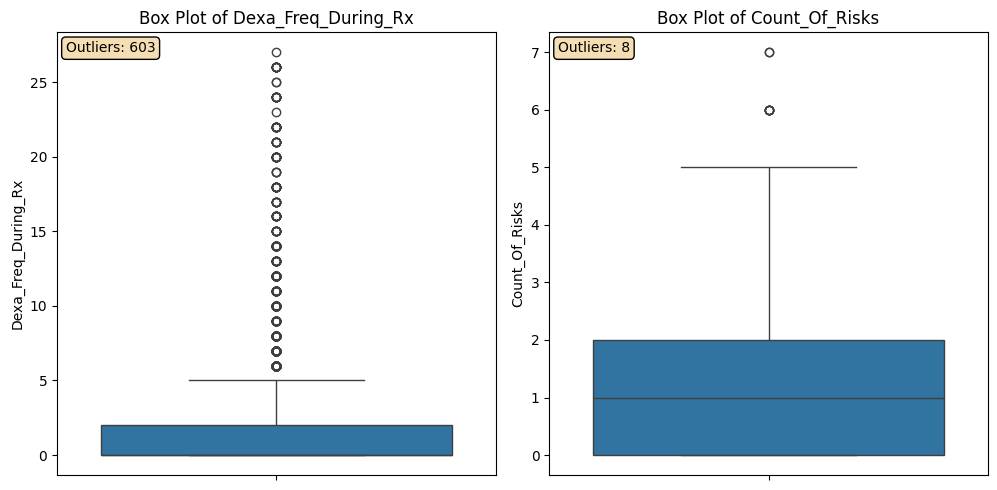

In [22]:
# Box plots for numerical variables to identify outliers
if len(new_num_col) > 0:
    n_cols = 3
    n_rows = (len(new_num_col) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    
    # Handle different subplot configurations
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
    else:
        axes = axes.flatten()

    for i, col in enumerate(new_num_col):
        if i < len(axes):
            sns.boxplot(data=new_df, y=col, ax=axes[i])
            axes[i].set_title(f'Box Plot of {col}')
            
            # Add statistical information
            q1, q3 = new_df[col].quantile(0.25), new_df[col].quantile(0.75)
            iqr = q3 - q1
            outliers = ((new_df[col] < q1 - 1.5*iqr) | (new_df[col] > q3 + 1.5*iqr)).sum()
            axes[i].text(0.02, 0.98, f'Outliers: {outliers}', transform=axes[i].transAxes,
                        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat'))

    # Hide empty subplots
    for i in range(len(new_num_col), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found for box plot analysis.")

### 4. Categorical Features Analysis

Categorical columns (65): ['Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_Disorders_of_lip

C:\Users\keval\AppData\Local\Temp\ipykernel_1576\140805146.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i],
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\140805146.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i],
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\140805146.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i],
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\140805146.py:35: FutureWarning: 

Passing `palette` without assigning `h

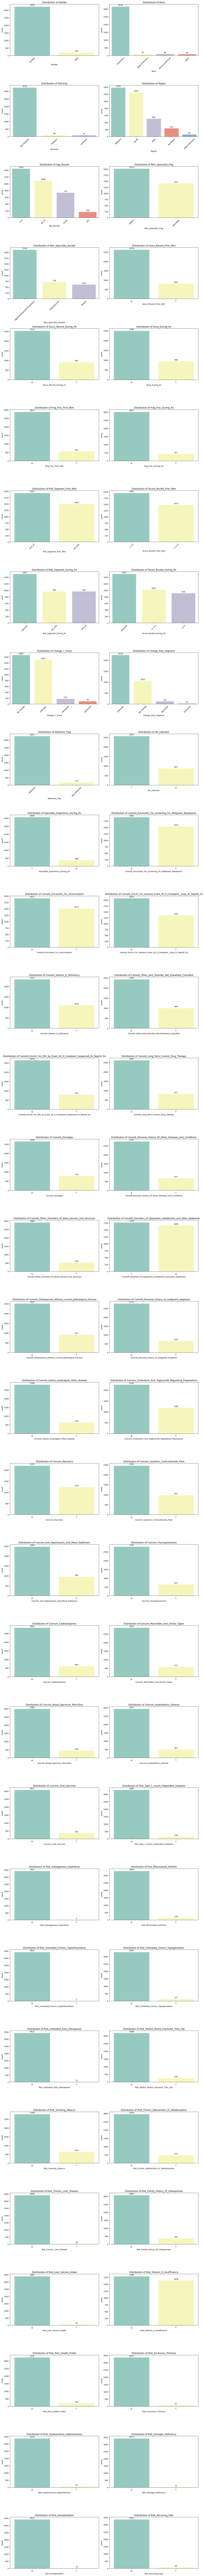

In [23]:
# Analyze categorical variables (excluding target)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Persistency_Flag']

print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

# Plot categorical variables with manageable unique values
categorical_to_plot = []
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")
    if unique_count <= 10:  # Only plot if manageable number of categories
        categorical_to_plot.append(col)

print(f"\nPlotting {len(categorical_to_plot)} categorical variables with ≤10 unique values")

# Create visualizations for categorical variables
if categorical_to_plot:
    n_cols = 2
    n_rows = (len(categorical_to_plot) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6 * n_rows))
    
    # Handle different subplot configurations
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(categorical_to_plot):
        if i < len(axes):
            value_counts = df[col].value_counts()
            sns.countplot(data=df, x=col, ax=axes[i], 
                         order=value_counts.index, palette='Set3')
            axes[i].set_title(f'Distribution of {col}')
            axes[i].tick_params(axis='x', rotation=45)
            
            # Add count labels
            for container in axes[i].containers:
                axes[i].bar_label(container, fmt='%d', label_type='edge', padding=3)
    
    # Hide empty subplots
    for i in range(len(categorical_to_plot), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No categorical variables with ≤10 unique values found for plotting.")

### 5. Feature Relationships with Target Variable

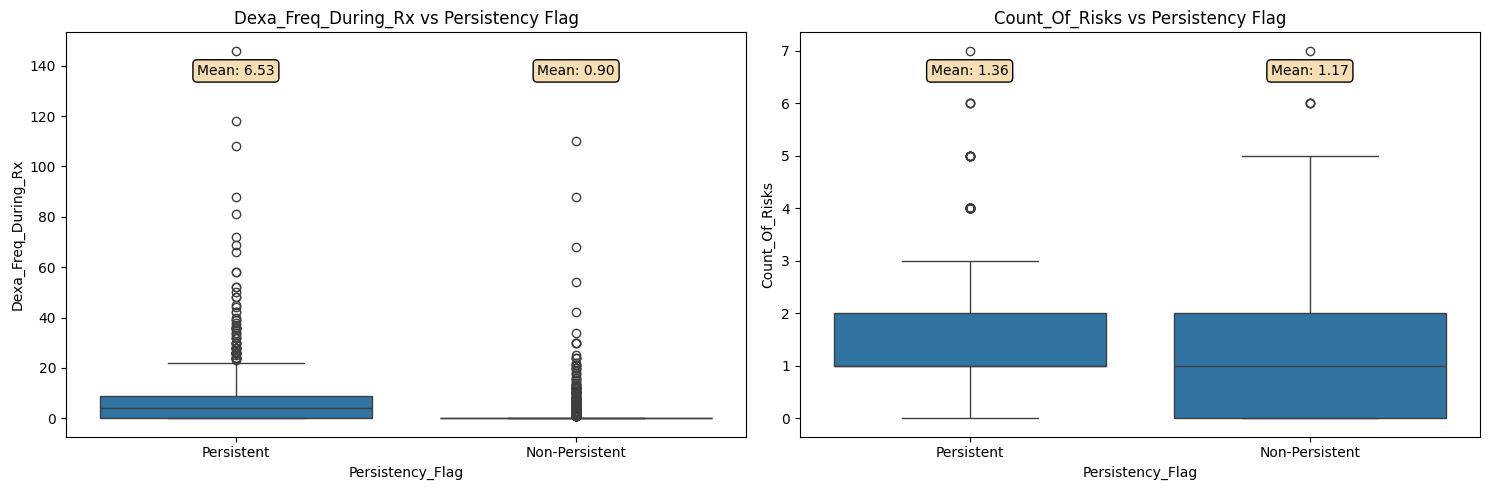

In [24]:
# Numerical features vs Target variable
if len(numerical_cols) > 0:
    n_cols = 2
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    
    # Handle different subplot configurations
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            # Box plot for numerical vs categorical target
            sns.boxplot(data=df, x='Persistency_Flag', y=col, ax=axes[i])
            axes[i].set_title(f'{col} vs Persistency Flag')
            
            # Add mean values as text
            for j, persistency in enumerate(df['Persistency_Flag'].unique()):
                subset = df[df['Persistency_Flag'] == persistency]
                mean_val = subset[col].mean()
                axes[i].text(j, axes[i].get_ylim()[1] * 0.9, f'Mean: {mean_val:.2f}', 
                           ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat'))
    
    # Hide empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found for target variable analysis.")

=== CATEGORICAL FEATURES VS TARGET VARIABLE ===

Gender vs Persistency_Flag:
Persistency_Flag  Non-Persistent  Persistent
Gender                                      
Female                     0.625       0.375
Male                       0.603       0.397
Chi-square test p-value: 0.5969
--------------------------------------------------

Race vs Persistency_Flag:
Persistency_Flag  Non-Persistent  Persistent
Race                                        
African American           0.684       0.316
Asian                      0.512       0.488
Caucasian                  0.624       0.376
Other/Unknown              0.660       0.340
Chi-square test p-value: 0.0900
--------------------------------------------------

Ethnicity vs Persistency_Flag:
Persistency_Flag  Non-Persistent  Persistent
Ethnicity                                   
Hispanic                   0.673       0.327
Not Hispanic               0.621       0.379
Unknown                    0.670       0.330
Chi-square test p-value

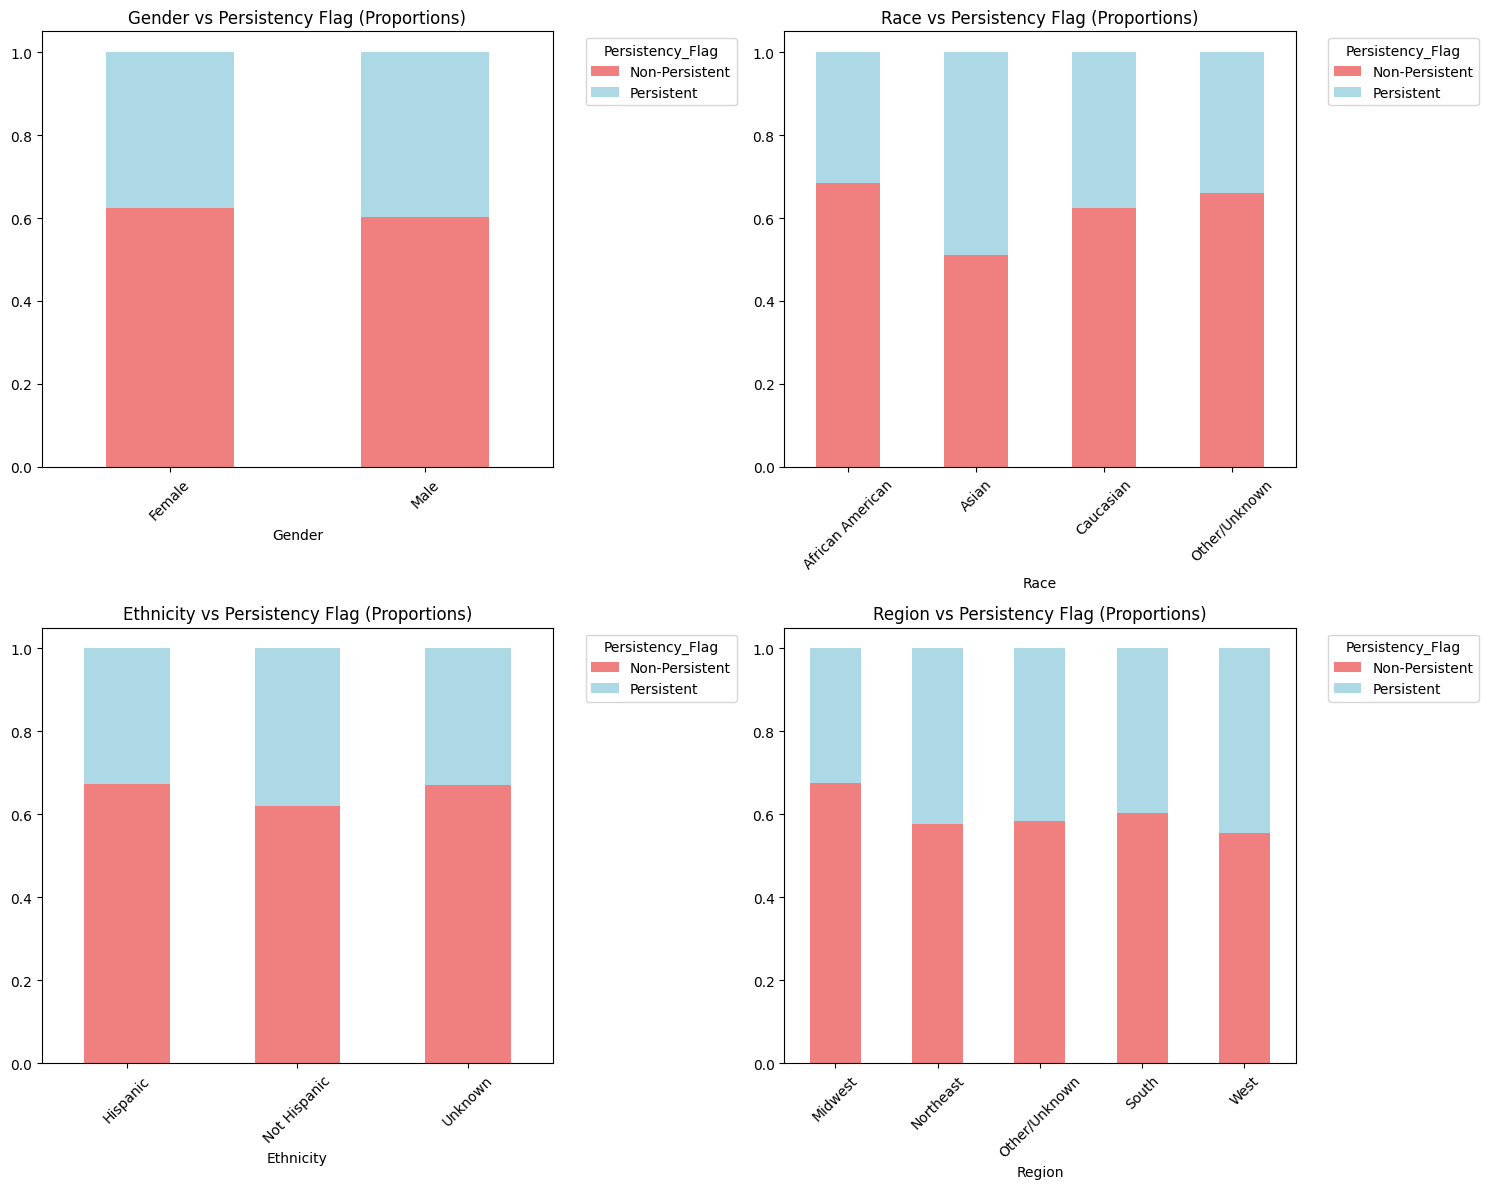

In [25]:
# Categorical features vs Target variable - Cross-tabulation analysis
print("=== CATEGORICAL FEATURES VS TARGET VARIABLE ===")

for col in categorical_to_plot:
    print(f"\n{col} vs Persistency_Flag:")
    crosstab = pd.crosstab(df[col], df['Persistency_Flag'], normalize='index')
    print(crosstab.round(3))
    
    # Chi-square test
    from scipy.stats import chi2_contingency
    contingency_table = pd.crosstab(df[col], df['Persistency_Flag'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test p-value: {p_value:.4f}")
    print("-" * 50)

# Visualize categorical vs target relationships for top variables
if len(categorical_to_plot) >= 2:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(categorical_to_plot[:4]):  # Show first 4 variables
        if i < len(axes):
            # Stacked bar chart showing proportions
            crosstab = pd.crosstab(df[col], df['Persistency_Flag'], normalize='index')
            crosstab.plot(kind='bar', stacked=True, ax=axes[i], 
                         color=['lightcoral', 'lightblue'])
            axes[i].set_title(f'{col} vs Persistency Flag (Proportions)')
            axes[i].legend(title='Persistency_Flag', bbox_to_anchor=(1.05, 1), loc='upper left')
            axes[i].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    for i in range(len(categorical_to_plot[:4]), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

### 6. Risk Factors Analysis

Risk-related columns found (23): ['Risk_Segment_Prior_Ntm', 'Risk_Segment_During_Rx', 'Change_Risk_Segment', 'Risk_Type_1_Insulin_Dependent_Diabetes', 'Risk_Osteogenesis_Imperfecta', 'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Untreated_Early_Menopause', 'Risk_Patient_Parent_Fractured_Their_Hip', 'Risk_Smoking_Tobacco', 'Risk_Chronic_Malnutrition_Or_Malabsorption', 'Risk_Chronic_Liver_Disease', 'Risk_Family_History_Of_Osteoporosis', 'Risk_Low_Calcium_Intake', 'Risk_Vitamin_D_Insufficiency', 'Risk_Poor_Health_Frailty', 'Risk_Excessive_Thinness', 'Risk_Hysterectomy_Oophorectomy', 'Risk_Estrogen_Deficiency', 'Risk_Immobilization', 'Risk_Recurring_Falls', 'Count_Of_Risks']

Binary risk columns (Y/N format): 19

Risk Factor Prevalence:
Risk_Type_1_Insulin_Dependent_Diabetes: 4.06%
Risk_Osteogenesis_Imperfecta: 0.09%
Risk_Rheumatoid_Arthritis: 3.80%
Risk_Untreated_Chronic_Hyperthyroidism: 0.06%
Risk_Untreated_Chronic_Hyp

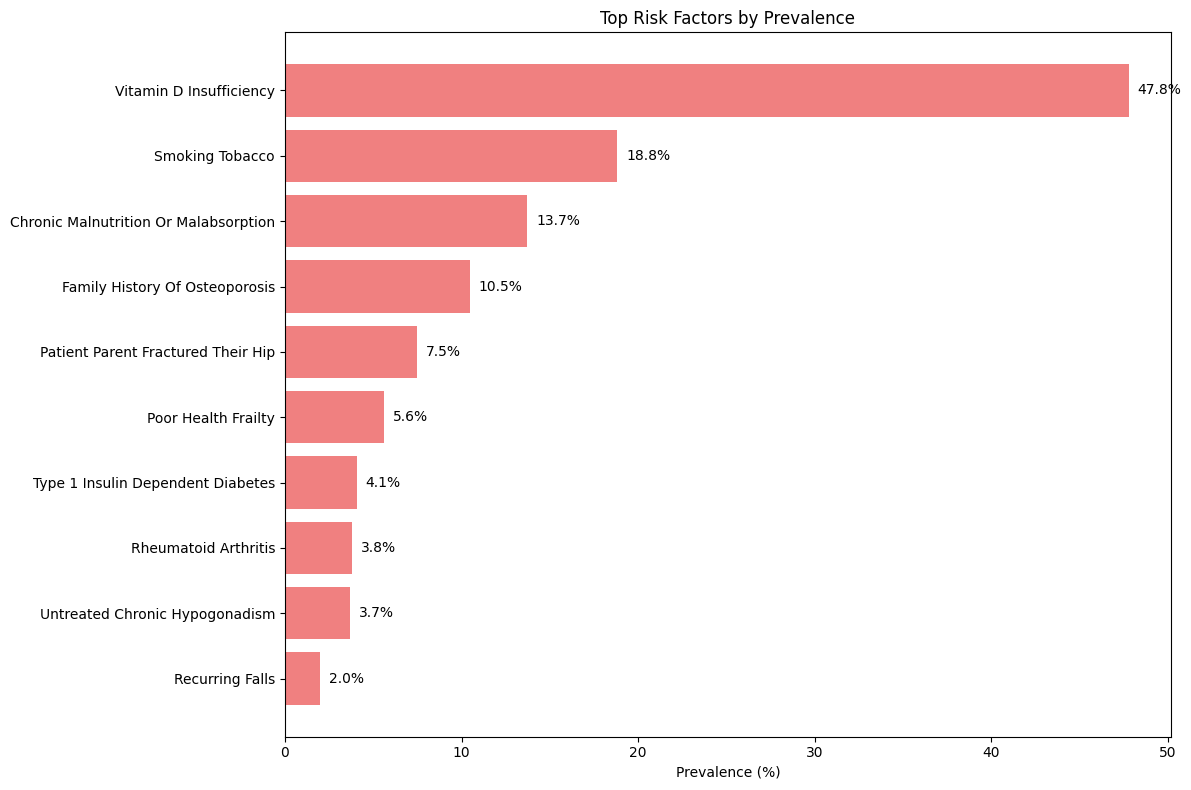


=== RISK FACTORS VS PERSISTENCY ===

Risk_Type_1_Insulin_Dependent_Diabetes:
  Persistency rate WITH risk: 0.331
  Persistency rate WITHOUT risk: 0.378
  Impact: -0.047

Risk_Osteogenesis_Imperfecta:
  Persistency rate WITH risk: 0.333
  Persistency rate WITHOUT risk: 0.376
  Impact: -0.043

Risk_Rheumatoid_Arthritis:
  Persistency rate WITH risk: 0.508
  Persistency rate WITHOUT risk: 0.371
  Impact: 0.136

Risk_Untreated_Chronic_Hyperthyroidism:
  Persistency rate WITH risk: 0.000
  Persistency rate WITHOUT risk: 0.377
  Impact: -0.377

Risk_Untreated_Chronic_Hypogonadism:
  Persistency rate WITH risk: 0.543
  Persistency rate WITHOUT risk: 0.370
  Impact: 0.173

Risk_Untreated_Early_Menopause:
  Persistency rate WITH risk: 0.333
  Persistency rate WITHOUT risk: 0.377
  Impact: -0.043

Risk_Patient_Parent_Fractured_Their_Hip:
  Persistency rate WITH risk: 0.391
  Persistency rate WITHOUT risk: 0.375
  Impact: 0.015

Risk_Smoking_Tobacco:
  Persistency rate WITH risk: 0.475
  Persist

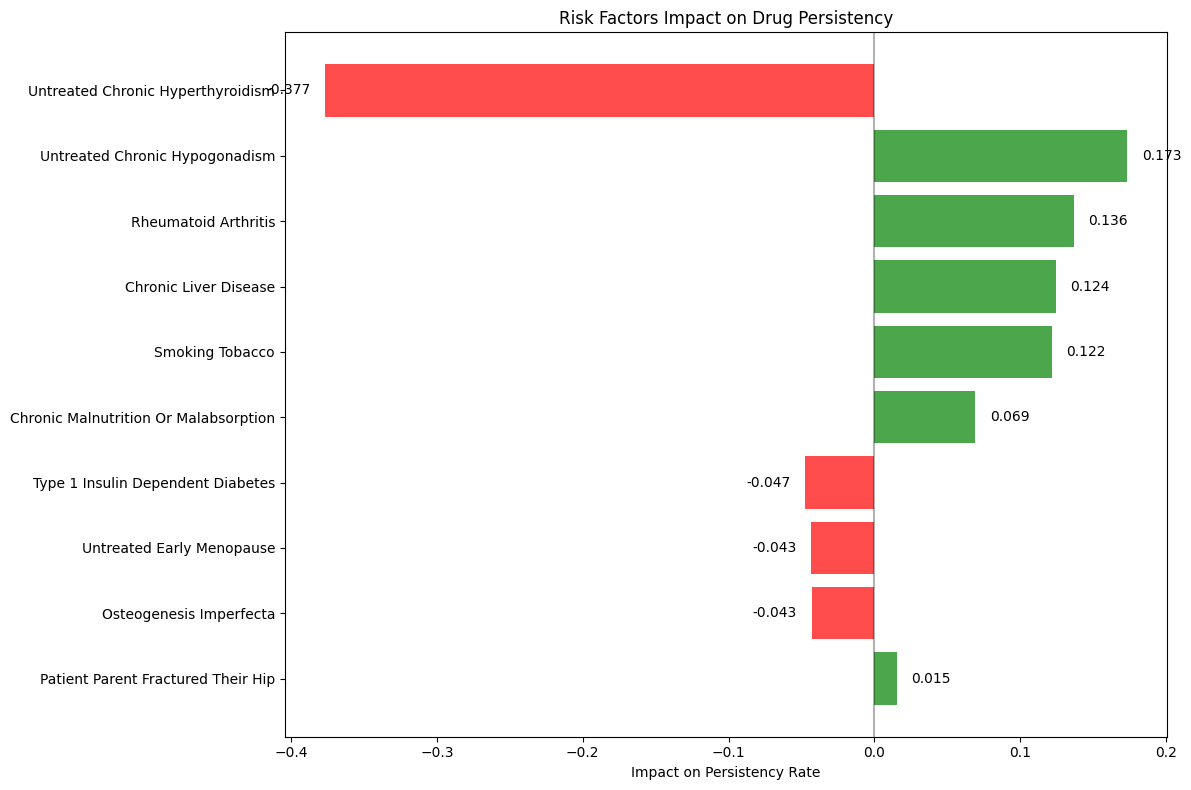


Note: Positive impact means higher persistency rate with the risk factor.
Negative impact means lower persistency rate with the risk factor.


In [26]:
# Identify risk-related columns
risk_columns = [col for col in df.columns if 'Risk_' in col.lower() or 'risk' in col.lower()]
print(f"Risk-related columns found ({len(risk_columns)}): {risk_columns}")

if risk_columns:
    # Analyze binary risk factors (Y/N format)
    binary_risk_cols = []
    for col in risk_columns:
        if df[col].dtype == 'object' and set(df[col].unique()).issubset({'Y', 'N'}):
            binary_risk_cols.append(col)
    
    print(f"\nBinary risk columns (Y/N format): {len(binary_risk_cols)}")
    
    if binary_risk_cols:
        # Convert to numerical for analysis
        risk_analysis_df = df.copy()
        for col in binary_risk_cols:
            risk_analysis_df[col + '_numeric'] = risk_analysis_df[col].map({'Y': 1, 'N': 0})
        
        # Calculate risk prevalence
        print("\nRisk Factor Prevalence:")
        risk_prevalence = {}
        for col in binary_risk_cols:
            prevalence = (risk_analysis_df[col] == 'Y').mean() * 100
            risk_prevalence[col] = prevalence
            print(f"{col}: {prevalence:.2f}%")
        
        # Sort by prevalence
        sorted_risks = sorted(risk_prevalence.items(), key=lambda x: x[1], reverse=True)
        
        # Plot top 10 risk factors by prevalence
        if len(sorted_risks) > 0:
            top_risks = sorted_risks[:min(10, len(sorted_risks))]
            
            plt.figure(figsize=(12, 8))
            risks_names = [risk[0].replace('Risk_', '').replace('_', ' ') for risk in top_risks]
            risks_values = [risk[1] for risk in top_risks]
            
            bars = plt.barh(risks_names, risks_values, color='lightcoral')
            plt.xlabel('Prevalence (%)')
            plt.title('Top Risk Factors by Prevalence')
            plt.gca().invert_yaxis()
            
            # Add percentage labels
            for i, v in enumerate(risks_values):
                plt.text(v + 0.5, i, f'{v:.1f}%', va='center')
            
            plt.tight_layout()
            plt.show()
        
        # Analyze risk factors vs persistency
        print("\n=== RISK FACTORS VS PERSISTENCY ===")
        risk_persistency_analysis = {}
        
        for col in binary_risk_cols[:10]:  # Analyze top 10 risks
            crosstab = pd.crosstab(risk_analysis_df[col], risk_analysis_df['Persistency_Flag'])
            
            # Check if both risk levels and persistency values exist
            try:
                persistency_rate_with_risk = crosstab.loc['Y', 'Persistent'] / (crosstab.loc['Y', 'Persistent'] + crosstab.loc['Y', 'Non-Persistent'])
                persistency_rate_without_risk = crosstab.loc['N', 'Persistent'] / (crosstab.loc['N', 'Persistent'] + crosstab.loc['N', 'Non-Persistent'])
                
                risk_persistency_analysis[col] = {
                    'with_risk': persistency_rate_with_risk,
                    'without_risk': persistency_rate_without_risk,
                    'impact': persistency_rate_with_risk - persistency_rate_without_risk
                }
                
                print(f"\n{col}:")
                print(f"  Persistency rate WITH risk: {persistency_rate_with_risk:.3f}")
                print(f"  Persistency rate WITHOUT risk: {persistency_rate_without_risk:.3f}")
                print(f"  Impact: {risk_persistency_analysis[col]['impact']:.3f}")
                
            except KeyError as e:
                print(f"\n{col}: Skipping due to missing data - {e}")
                print(f"  Available categories: {crosstab.index.tolist()}")
                print(f"  Available outcomes: {crosstab.columns.tolist()}")
        
        # Plot risk impact on persistency
        if risk_persistency_analysis:  # Only plot if we have data
            risk_impacts = [(k, v['impact']) for k, v in risk_persistency_analysis.items()]
            risk_impacts.sort(key=lambda x: abs(x[1]), reverse=True)
            
            if len(risk_impacts) > 0:
                plt.figure(figsize=(12, 8))
                names = [impact[0].replace('Risk_', '').replace('_', ' ') for impact in risk_impacts]
                impacts = [impact[1] for impact in risk_impacts]
                
                colors = ['red' if x < 0 else 'green' for x in impacts]
                bars = plt.barh(names, impacts, color=colors, alpha=0.7)
                plt.xlabel('Impact on Persistency Rate')
                plt.title('Risk Factors Impact on Drug Persistency')
                plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
                plt.gca().invert_yaxis()
                
                # Add impact labels
                for i, v in enumerate(impacts):
                    plt.text(v + (0.01 if v >= 0 else -0.01), i, f'{v:.3f}', 
                            va='center', ha='left' if v >= 0 else 'right')
                
                plt.tight_layout()
                plt.show()
                
                print("\nNote: Positive impact means higher persistency rate with the risk factor.")
                print("Negative impact means lower persistency rate with the risk factor.")
            else:
                print("No valid risk impact data available for plotting.")
        else:
            print("No risk persistency analysis data available for plotting.")
            
else:
    print("No risk-related columns found in the dataset.")

### 7. Key Insights and Findings Summary

In [27]:
# EDA Summary and Key Insights
print("="*60)
print("           EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*60)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"   • Memory Usage: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")
print(f"   • Missing Values: {df.isnull().sum().sum()} total")
print(f"   • Duplicate Rows: {df.duplicated().sum()}")

print(f"\n🎯 TARGET VARIABLE (Persistency_Flag):")
target_dist = df['Persistency_Flag'].value_counts()
for label, count in target_dist.items():
    print(f"   • {label}: {count} ({count/len(df)*100:.1f}%)")

print(f"\n🔢 NUMERICAL FEATURES:")
print(f"   • Count: {len(numerical_cols)} columns")
print(f"   • Columns: {numerical_cols}")

print(f"\n📋 CATEGORICAL FEATURES:")
print(f"   • Count: {len(categorical_cols)} columns")
print(f"   • High cardinality (>10 categories): {len([col for col in categorical_cols if df[col].nunique() > 10])}")

if risk_columns:
    print(f"\n⚠️  RISK FACTORS:")
    print(f"   • Total risk columns: {len(risk_columns)}")
    print(f"   • Binary risk factors (Y/N): {len([col for col in risk_columns if df[col].dtype == 'object' and set(df[col].unique()).issubset({'Y', 'N'})])}")

print(f"\n🔍 KEY FINDINGS FOR MODEL BUILDING:")
print("   • Data Quality: Dataset appears clean with minimal missing values")
print("   • Class Balance: Check if target variable is balanced for modeling")
print("   • Feature Types: Mixed data types requiring proper preprocessing")
print("   • Risk Factors: Multiple risk indicators available for feature engineering")
print("   • Correlations: Examine correlation matrix for multicollinearity")

print(f"\n✅ NEXT STEPS:")
print("   1. Handle any remaining missing values")
print("   2. Encode categorical variables appropriately")
print("   3. Scale numerical features if needed")
print("   4. Address class imbalance if present")
print("   5. Feature selection based on correlation and importance")
print("   6. Build and evaluate machine learning models")

print("="*60)

           EXPLORATORY DATA ANALYSIS SUMMARY

📊 DATASET OVERVIEW:
   • Dataset Shape: 3424 rows × 68 columns
   • Memory Usage: 11.23 MB
   • Missing Values: 0 total
   • Duplicate Rows: 6

🎯 TARGET VARIABLE (Persistency_Flag):
   • Non-Persistent: 2135 (62.4%)
   • Persistent: 1289 (37.6%)

🔢 NUMERICAL FEATURES:
   • Count: 2 columns
   • Columns: ['Dexa_Freq_During_Rx', 'Count_Of_Risks']

📋 CATEGORICAL FEATURES:
   • Count: 65 columns
   • High cardinality (>10 categories): 1

⚠️  RISK FACTORS:
   • Total risk columns: 23
   • Binary risk factors (Y/N): 19

🔍 KEY FINDINGS FOR MODEL BUILDING:
   • Data Quality: Dataset appears clean with minimal missing values
   • Class Balance: Check if target variable is balanced for modeling
   • Feature Types: Mixed data types requiring proper preprocessing
   • Risk Factors: Multiple risk indicators available for feature engineering
   • Correlations: Examine correlation matrix for multicollinearity

✅ NEXT STEPS:
   1. Handle any remaining miss

### Data Cleaning & Feature Engineering

In [28]:
df.isnull().mean()*100

Persistency_Flag                  0.0
Gender                            0.0
Race                              0.0
Ethnicity                         0.0
Region                            0.0
                                 ... 
Risk_Hysterectomy_Oophorectomy    0.0
Risk_Estrogen_Deficiency          0.0
Risk_Immobilization               0.0
Risk_Recurring_Falls              0.0
Count_Of_Risks                    0.0
Length: 68, dtype: float64

In [29]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [30]:
# Analyze categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols.tolist())

print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("\n")

Categorical columns: ['Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_D

#### Feature Engineering Steps

In [31]:
# 1. Encode categorical variables using OneHot Encoder, Label Encoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# OneHot Encoding (creates multiple binary columns)
data_processed = df.copy()

# Exclude target variable from encoding
categorical_cols_to_encode = [col for col in categorical_cols if col != 'Persistency_Flag']

for col in categorical_cols_to_encode:
    # Create a new encoder for each column
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_col = encoder.fit_transform(data_processed[[col]])
    
    # Get feature names correctly based on the number of columns after drop='first'
    feature_names = encoder.get_feature_names_out([col])
    
    encoded_df = pd.DataFrame(encoded_col, columns=feature_names, index=data_processed.index)
    data_processed = pd.concat([data_processed, encoded_df], axis=1)
    data_processed.drop(columns=[col], inplace=True)

print(f"OneHot encoding completed for {len(categorical_cols_to_encode)} columns")
print(f"Data shape after OneHot encoding: {data_processed.shape}")

# # OneHot Encoding
le = LabelEncoder()
data_processed['Persistency_Flag'] = le.fit_transform(data_processed['Persistency_Flag'])


OneHot encoding completed for 65 columns
Data shape after OneHot encoding: (3424, 117)


In [32]:
df

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,1
3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,...,N,N,Y,N,N,N,N,N,N,1
3422,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0


In [33]:
# Display the Label encoded data
print("Label Encoded Data Shape:", data_processed.shape)
print("\nFirst few rows of Label encoded data:")
data_processed.head()

Label Encoded Data Shape: (3424, 117)

First few rows of Label encoded data:


,Persistency_Flag,Dexa_Freq_During_Rx,Count_Of_Risks,Gender_Male,Race_Asian,Race_Caucasian,Race_Other/Unknown,Ethnicity_Not Hispanic,Ethnicity_Unknown,Region_Northeast,...,Risk_Chronic_Liver_Disease_Y,Risk_Family_History_Of_Osteoporosis_Y,Risk_Low_Calcium_Intake_Y,Risk_Vitamin_D_Insufficiency_Y,Risk_Poor_Health_Frailty_Y,Risk_Excessive_Thinness_Y,Risk_Hysterectomy_Oophorectomy_Y,Risk_Estrogen_Deficiency_Y,Risk_Immobilization_Y,Risk_Recurring_Falls_Y
0,1,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,1
3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,...,N,N,Y,N,N,N,N,N,N,1
3422,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0


In [35]:
# 3. Create risk score features from risk-related columns
# Filter only binary risk columns (Y/N format) from original dataframe
binary_risk_columns = [col for col in df.columns if 'Risk_' in col and 
                      df[col].dtype == 'object' and 
                      set(df[col].unique()).issubset({'Y', 'N'})]

print(f"Found {len(binary_risk_columns)} binary risk columns:")
print(binary_risk_columns[:10])  # Show first 10

if binary_risk_columns:
    # Convert Y/N to 1/0 for binary risk columns in data_processed
    for col in binary_risk_columns:
        # First add the original column to data_processed if not already there
        if col not in data_processed.columns:
            data_processed[col] = df[col]
        # Create numeric version
        data_processed[col + '_numeric'] = data_processed[col].map({'Y': 1, 'N': 0})
        data_processed.drop(columns=[col], inplace=True)

    # Calculate total risk score using numeric columns
    numeric_risk_cols = [col + '_numeric' for col in binary_risk_columns]
    data_processed['Total_Risk_Score'] = data_processed[numeric_risk_cols].sum(axis=1)
    
    # Create risk categories
    data_processed['Risk_Category'] = pd.cut(data_processed['Total_Risk_Score'], 
                                         bins=[-1, 0, 2, 5, float('inf')], 
                                         labels=['No_Risk', 'Low_Risk', 'Medium_Risk', 'High_Risk'])
    
    print(f"\nRisk score distribution:")
    print(data_processed['Total_Risk_Score'].describe())
    print(f"\nRisk category distribution:")
    print(data_processed['Risk_Category'].value_counts())

Found 19 binary risk columns:
['Risk_Type_1_Insulin_Dependent_Diabetes', 'Risk_Osteogenesis_Imperfecta', 'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Untreated_Early_Menopause', 'Risk_Patient_Parent_Fractured_Their_Hip', 'Risk_Smoking_Tobacco', 'Risk_Chronic_Malnutrition_Or_Malabsorption', 'Risk_Chronic_Liver_Disease']

Risk score distribution:
count    3424.000000
mean        1.239486
std         1.094914
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: Total_Risk_Score, dtype: float64

Risk category distribution:
Risk_Category
Low_Risk       2023
No_Risk         970
Medium_Risk     423
High_Risk         8
Name: count, dtype: int64

Risk score distribution:
count    3424.000000
mean        1.239486
std         1.094914
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: Total_Risk_Score, dtype: f

## Generate PDF Report for EDA

Creating a comprehensive PDF report of all the Exploratory Data Analysis findings.

In [36]:
# Install required libraries for PDF generation
import subprocess
import sys

def install_package(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"Successfully installed {package}")
    except subprocess.CalledProcessError:
        print(f"Failed to install {package}")

# Install required packages
packages = ["matplotlib", "reportlab", "fpdf2"]
for package in packages:
    install_package(package)

print("PDF generation libraries installed successfully!")

PDF generation libraries installed successfully!
PDF generation libraries installed successfully!


In [37]:
# Import libraries for PDF generation
from fpdf import FPDF
from datetime import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import base64

class EDA_PDF_Report:
    def __init__(self, title="Exploratory Data Analysis Report"):
        self.pdf = FPDF()
        self.pdf.set_auto_page_break(auto=True, margin=15)
        self.title = title
        
    def add_title_page(self):
        self.pdf.add_page()
        self.pdf.set_font('Arial', 'B', 24)
        self.pdf.ln(60)
        self.pdf.cell(0, 10, self.title, 0, 1, 'C')
        
        self.pdf.set_font('Arial', 'B', 16)
        self.pdf.ln(20)
        self.pdf.cell(0, 10, 'Drug Persistency Analysis - Healthcare Project', 0, 1, 'C')
        
        self.pdf.set_font('Arial', '', 12)
        self.pdf.ln(30)
        self.pdf.cell(0, 10, f'Generated on: {datetime.now().strftime("%B %d, %Y")}', 0, 1, 'C')
        
    def add_section_header(self, title):
        self.pdf.ln(10)
        self.pdf.set_font('Arial', 'B', 16)
        self.pdf.cell(0, 10, title, 0, 1, 'L')
        self.pdf.ln(5)
        
    def add_text(self, text, font_size=10):
        self.pdf.set_font('Arial', '', font_size)
        # Split long text into lines
        lines = text.split('\n')
        for line in lines:
            if len(line) > 80:  # Wrap long lines
                words = line.split(' ')
                current_line = ''
                for word in words:
                    if len(current_line + word) < 80:
                        current_line += word + ' '
                    else:
                        self.pdf.cell(0, 6, current_line.strip(), 0, 1)
                        current_line = word + ' '
                if current_line:
                    self.pdf.cell(0, 6, current_line.strip(), 0, 1)
            else:
                self.pdf.cell(0, 6, line, 0, 1)
        self.pdf.ln(5)
        
    def save_plot_and_add_to_pdf(self, title="Chart"):
        # Save current plot as image
        img_path = f"temp_{title.replace(' ', '_').lower()}.png"
        plt.savefig(img_path, dpi=150, bbox_inches='tight')
        plt.close()
        
        # Add to PDF
        try:
            self.pdf.add_page()
            self.add_section_header(title)
            self.pdf.image(img_path, x=10, y=None, w=190)
        except:
            self.add_text(f"Could not add image: {title}")
        
        # Clean up temp file
        try:
            os.remove(img_path)
        except:
            pass
            
    def save_pdf(self, filename):
        self.pdf.output(filename)
        print(f"PDF report saved as: {filename}")

# Initialize the PDF report
pdf_report = EDA_PDF_Report("Exploratory Data Analysis Report")
print("PDF Report class initialized successfully!")

PDF Report class initialized successfully!


In [38]:
# Generate comprehensive EDA PDF report
def generate_eda_pdf():
    try:
        # Add title page
        pdf_report.add_title_page()
        
        # Add dataset overview
        pdf_report.pdf.add_page()
        pdf_report.add_section_header("1. Dataset Overview")
        
        overview_text = f"""
Dataset Information:
• Total Records: {df.shape[0]:,}
• Total Features: {df.shape[1]}
• Memory Usage: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB
• Missing Values: {df.isnull().sum().sum()}
• Duplicate Rows: {df.duplicated().sum()}

Data Types Distribution:
"""
        
        # Add data types info
        dtype_counts = df.dtypes.value_counts()
        for dtype, count in dtype_counts.items():
            overview_text += f"• {dtype}: {count} columns\n"
            
        pdf_report.add_text(overview_text)
        
        # Add target variable analysis
        pdf_report.add_section_header("2. Target Variable Analysis")
        
        target_dist = df['Persistency_Flag'].value_counts()
        target_text = f"""
Target Variable: Persistency_Flag

Class Distribution:
"""
        for label, count in target_dist.items():
            percentage = (count/len(df)*100)
            target_text += f"• {label}: {count:,} ({percentage:.2f}%)\n"
            
        # Check for class imbalance
        if len(target_dist) == 2:
            imbalance_ratio = target_dist.max() / target_dist.min()
            target_text += f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}:1"
            if imbalance_ratio > 1.5:
                target_text += " (Imbalanced - consider resampling techniques)"
            else:
                target_text += " (Balanced)"
                
        pdf_report.add_text(target_text)
        
        # Generate and add target variable visualization
        plt.figure(figsize=(12, 8))
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
        
        # Pie chart
        target_dist.plot(kind='pie', ax=ax1, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
        ax1.set_title('Persistency Flag Distribution')
        ax1.set_ylabel('')
        
        # Bar chart
        target_dist.plot(kind='bar', ax=ax2, color=['lightcoral', 'lightblue'])
        ax2.set_title('Count Distribution')
        ax2.set_ylabel('Count')
        ax2.tick_params(axis='x', rotation=0)
        
        # Class balance
        target_ratio = df['Persistency_Flag'].value_counts(normalize=True)
        target_ratio.plot(kind='bar', ax=ax3, color=['lightcoral', 'lightblue'])
        ax3.set_title('Class Balance Ratio')
        ax3.set_ylabel('Proportion')
        ax3.tick_params(axis='x', rotation=0)
        
        # Statistics table (simplified)
        ax4.axis('off')
        stats_data = []
        for label, count in target_dist.items():
            stats_data.append([label, f"{count:,}", f"{count/len(df)*100:.2f}%"])
        
        table = ax4.table(cellText=stats_data,
                         colLabels=['Category', 'Count', 'Percentage'],
                         cellLoc='center',
                         loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        ax4.set_title('Statistics Summary', pad=20)
        
        plt.tight_layout()
        pdf_report.save_plot_and_add_to_pdf("Target Variable Analysis")
        
        print("Target variable analysis added to PDF")
        
    except Exception as e:
        print(f"Error generating PDF: {e}")
        
# Start generating the PDF
generate_eda_pdf()

C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:18: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.pdf.set_font('Arial', 'B', 24)
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:20: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.pdf.cell(0, 10, self.title, 0, 1, 'C')
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:22: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.pdf.set_font('Arial', 'B', 16)
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:24: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.pdf.cell(0, 10, 'Drug Persistency Analysis - Healthcare Project', 0, 1, 'C')
C:\Users\keval\AppData\L

Error generating PDF: Character "•" at index 0 in text is outside the range of characters supported by the font used: "helvetica". Please consider using a Unicode font.


C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:37: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.pdf.set_font('Arial', '', font_size)
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:53: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.pdf.cell(0, 6, line, 0, 1)


In [39]:
# Add numerical features analysis to PDF
def add_numerical_analysis():
    try:
        numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        
        pdf_report.add_section_header("3. Numerical Features Analysis")
        
        numerical_text = f"""
Numerical Features Summary:
• Number of numerical columns: {len(numerical_cols)}
• Columns: {', '.join(numerical_cols) if numerical_cols else 'None'}

Statistical Summary:
"""
        
        if numerical_cols:
            desc_stats = df[numerical_cols].describe()
            numerical_text += f"• Features analyzed: {len(numerical_cols)}\n"
            numerical_text += f"• Mean values range: {desc_stats.loc['mean'].min():.2f} to {desc_stats.loc['mean'].max():.2f}\n"
            numerical_text += f"• Standard deviation range: {desc_stats.loc['std'].min():.2f} to {desc_stats.loc['std'].max():.2f}\n"
            
            # Add correlation insights
            if len(numerical_cols) > 1:
                corr_matrix = df[numerical_cols].corr()
                strong_corr_pairs = []
                for i in range(len(corr_matrix.columns)):
                    for j in range(i+1, len(corr_matrix.columns)):
                        corr_val = corr_matrix.iloc[i, j]
                        if abs(corr_val) > 0.5:
                            strong_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))
                
                if strong_corr_pairs:
                    numerical_text += f"\nStrong Correlations (|r| > 0.5): {len(strong_corr_pairs)} found\n"
                    for col1, col2, corr_val in strong_corr_pairs[:5]:  # Show top 5
                        numerical_text += f"• {col1} - {col2}: {corr_val:.3f}\n"
                else:
                    numerical_text += "\nNo strong correlations (|r| > 0.5) found between numerical features\n"
        else:
            numerical_text += "No numerical features found in the dataset.\n"
            
        pdf_report.add_text(numerical_text)
        
        # Generate correlation heatmap if numerical columns exist
        if len(numerical_cols) > 1:
            plt.figure(figsize=(12, 10))
            correlation_matrix = df[numerical_cols].corr()
            mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
            
            sns.heatmap(correlation_matrix, mask=mask, annot=True, 
                       cmap='coolwarm', center=0, square=True, fmt='.2f',
                       cbar_kws={"shrink": .8})
            plt.title('Correlation Matrix of Numerical Variables')
            plt.tight_layout()
            pdf_report.save_plot_and_add_to_pdf("Numerical Features Correlation Matrix")
        
        print("Numerical features analysis added to PDF")
        
    except Exception as e:
        print(f"Error adding numerical analysis: {e}")

add_numerical_analysis()

Error adding numerical analysis: Character "•" at index 0 in text is outside the range of characters supported by the font used: "helvetica". Please consider using a Unicode font.


C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:32: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.pdf.set_font('Arial', 'B', 16)
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:33: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.pdf.cell(0, 10, title, 0, 1, 'L')
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:37: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.pdf.set_font('Arial', '', font_size)
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:53: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.pdf.cell(0, 6, line, 0, 1)


In [40]:
# Add categorical features analysis to PDF
def add_categorical_analysis():
    try:
        categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
        categorical_cols = [col for col in categorical_cols if col != 'Persistency_Flag']
        
        pdf_report.add_section_header("4. Categorical Features Analysis")
        
        categorical_text = f"""
Categorical Features Summary:
• Number of categorical columns: {len(categorical_cols)}
• Total categories (excluding target): {len(categorical_cols)}

Feature Cardinality Analysis:
"""
        
        if categorical_cols:
            low_cardinality = []
            medium_cardinality = []
            high_cardinality = []
            
            for col in categorical_cols:
                unique_count = df[col].nunique()
                if unique_count <= 5:
                    low_cardinality.append((col, unique_count))
                elif unique_count <= 20:
                    medium_cardinality.append((col, unique_count))
                else:
                    high_cardinality.append((col, unique_count))
            
            categorical_text += f"• Low cardinality (≤5 categories): {len(low_cardinality)} features\n"
            categorical_text += f"• Medium cardinality (6-20 categories): {len(medium_cardinality)} features\n"
            categorical_text += f"• High cardinality (>20 categories): {len(high_cardinality)} features\n\n"
            
            # Detail the features
            if low_cardinality:
                categorical_text += "Low Cardinality Features:\n"
                for col, count in low_cardinality:
                    categorical_text += f"• {col}: {count} unique values\n"
                    
            if medium_cardinality:
                categorical_text += "\nMedium Cardinality Features:\n"
                for col, count in medium_cardinality[:5]:  # Show first 5
                    categorical_text += f"• {col}: {count} unique values\n"
                    
            if high_cardinality:
                categorical_text += "\nHigh Cardinality Features:\n"
                for col, count in high_cardinality[:5]:  # Show first 5
                    categorical_text += f"• {col}: {count} unique values\n"
                    
        else:
            categorical_text += "No categorical features found (excluding target variable).\n"
            
        pdf_report.add_text(categorical_text)
        print("Categorical features analysis added to PDF")
        
    except Exception as e:
        print(f"Error adding categorical analysis: {e}")

add_categorical_analysis()

C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:32: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.pdf.set_font('Arial', 'B', 16)
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:33: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.pdf.cell(0, 10, title, 0, 1, 'L')


Error adding categorical analysis: Character "•" at index 0 in text is outside the range of characters supported by the font used: "helvetica". Please consider using a Unicode font.


C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:37: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.pdf.set_font('Arial', '', font_size)
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:53: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.pdf.cell(0, 6, line, 0, 1)


In [41]:
# Add risk factors analysis to PDF
def add_risk_analysis():
    try:
        risk_columns = [col for col in df.columns if 'Risk_' in col.lower() or 'risk' in col.lower()]
        binary_risk_cols = []
        
        for col in risk_columns:
            if df[col].dtype == 'object' and set(df[col].unique()).issubset({'Y', 'N'}):
                binary_risk_cols.append(col)
        
        pdf_report.add_section_header("5. Risk Factors Analysis")
        
        risk_text = f"""
Risk Factors Summary:
• Total risk-related columns: {len(risk_columns)}
• Binary risk factors (Y/N format): {len(binary_risk_cols)}

Risk Factor Prevalence (Top 10):
"""
        
        if binary_risk_cols:
            # Calculate prevalence
            risk_prevalence = {}
            for col in binary_risk_cols:
                prevalence = (df[col] == 'Y').mean() * 100
                risk_prevalence[col] = prevalence
            
            # Sort by prevalence
            sorted_risks = sorted(risk_prevalence.items(), key=lambda x: x[1], reverse=True)
            
            # Add top 10 to text
            for i, (risk, prevalence) in enumerate(sorted_risks[:10]):
                risk_name = risk.replace('Risk_', '').replace('_', ' ')
                risk_text += f"{i+1}. {risk_name}: {prevalence:.2f}%\n"
            
            # Generate risk prevalence chart
            if len(sorted_risks) > 0:
                top_risks = sorted_risks[:min(10, len(sorted_risks))]
                
                plt.figure(figsize=(12, 8))
                risks_names = [risk[0].replace('Risk_', '').replace('_', ' ') for risk in top_risks]
                risks_values = [risk[1] for risk in top_risks]
                
                plt.barh(risks_names, risks_values, color='lightcoral')
                plt.xlabel('Prevalence (%)')
                plt.title('Top 10 Risk Factors by Prevalence')
                plt.gca().invert_yaxis()
                
                # Add percentage labels
                for i, v in enumerate(risks_values):
                    plt.text(v + 0.5, i, f'{v:.1f}%', va='center')
                
                plt.tight_layout()
                pdf_report.save_plot_and_add_to_pdf("Risk Factors Prevalence")
        
        else:
            risk_text += "No binary risk factors (Y/N format) found in the dataset.\n"
            
        pdf_report.add_text(risk_text)
        print("Risk factors analysis added to PDF")
        
    except Exception as e:
        print(f"Error adding risk analysis: {e}")

add_risk_analysis()

C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:32: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.pdf.set_font('Arial', 'B', 16)
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:33: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.pdf.cell(0, 10, title, 0, 1, 'L')
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:33: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.pdf.cell(0, 10, title, 0, 1, 'L')


Error adding risk analysis: Character "•" at index 0 in text is outside the range of characters supported by the font used: "helvetica". Please consider using a Unicode font.


C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:37: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.pdf.set_font('Arial', '', font_size)
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:53: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.pdf.cell(0, 6, line, 0, 1)


In [42]:
# Add key findings and conclusions to PDF
def add_key_findings():
    try:
        pdf_report.add_section_header("6. Key Findings & Insights")
        
        # Calculate key metrics for insights
        target_dist = df['Persistency_Flag'].value_counts()
        imbalance_ratio = target_dist.max() / target_dist.min() if len(target_dist) == 2 else 1
        
        numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
        categorical_cols = [col for col in categorical_cols if col != 'Persistency_Flag']
        
        risk_columns = [col for col in df.columns if 'Risk_' in col.lower() or 'risk' in col.lower()]
        binary_risk_cols = [col for col in risk_columns if df[col].dtype == 'object' and set(df[col].unique()).issubset({'Y', 'N'})]
        
        findings_text = f"""
Data Quality Assessment:
• Dataset contains {df.shape[0]:,} records with {df.shape[1]} features
• Missing values: {df.isnull().sum().sum()} ({df.isnull().sum().sum()/df.size*100:.2f}% of total data)
• Duplicate records: {df.duplicated().sum()} ({df.duplicated().sum()/len(df)*100:.2f}%)
• Overall data quality: {'Good' if df.isnull().sum().sum()/df.size < 0.05 else 'Needs attention'}

Target Variable Analysis:
• Target variable: Persistency_Flag with {len(target_dist)} classes
• Class distribution: {' vs '.join([f'{label}: {count/len(df)*100:.1f}%' for label, count in target_dist.items()])}
• Class balance: {'Balanced' if imbalance_ratio <= 1.5 else f'Imbalanced ({imbalance_ratio:.1f}:1 ratio)'}
• Recommendation: {'Ready for modeling' if imbalance_ratio <= 2 else 'Consider resampling techniques'}

Feature Composition:
• Numerical features: {len(numerical_cols)} ({len(numerical_cols)/df.shape[1]*100:.1f}% of total)
• Categorical features: {len(categorical_cols)} ({len(categorical_cols)/df.shape[1]*100:.1f}% of total)
• Risk factors identified: {len(binary_risk_cols)} binary risk indicators

Risk Factors Insights:
"""
        
        if binary_risk_cols:
            # Find highest prevalence risk
            risk_prevalence = {col: (df[col] == 'Y').mean() * 100 for col in binary_risk_cols}
            highest_risk = max(risk_prevalence, key=risk_prevalence.get)
            lowest_risk = min(risk_prevalence, key=risk_prevalence.get)
            
            findings_text += f"• Highest prevalence risk: {highest_risk.replace('Risk_', '').replace('_', ' ')} ({risk_prevalence[highest_risk]:.1f}%)\n"
            findings_text += f"• Lowest prevalence risk: {lowest_risk.replace('Risk_', '').replace('_', ' ')} ({risk_prevalence[lowest_risk]:.1f}%)\n"
            findings_text += f"• Average risk prevalence: {np.mean(list(risk_prevalence.values())):.1f}%\n"
        else:
            findings_text += "• No binary risk factors identified\n"
        
        findings_text += f"""

Modeling Recommendations:
• Preprocessing needed: {'Yes' if len(categorical_cols) > 0 or df.isnull().sum().sum() > 0 else 'Minimal'}
• Feature encoding required for: {len(categorical_cols)} categorical variables
• Missing value treatment: {'Required' if df.isnull().sum().sum() > 0 else 'Not needed'}
• Class balancing: {'Recommended' if imbalance_ratio > 1.5 else 'Not required'}
• Feature scaling: {'Recommended' if len(numerical_cols) > 0 else 'Not applicable'}

Next Steps:
1. Handle missing values using appropriate imputation strategies
2. Encode categorical variables (OneHot/Label encoding)
3. {'Apply class balancing techniques (SMOTE/undersampling)' if imbalance_ratio > 1.5 else 'Proceed with current class distribution'}
4. Scale numerical features for algorithms sensitive to feature magnitude
5. Consider feature selection based on correlation and importance
6. Split data into training/validation/test sets
7. Evaluate multiple classification algorithms
8. Validate model performance using cross-validation
"""
        
        pdf_report.add_text(findings_text)
        print("Key findings and recommendations added to PDF")
        
    except Exception as e:
        print(f"Error adding key findings: {e}")

add_key_findings()

C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:32: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.pdf.set_font('Arial', 'B', 16)
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:33: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.pdf.cell(0, 10, title, 0, 1, 'L')


Error adding key findings: Character "•" at index 0 in text is outside the range of characters supported by the font used: "helvetica". Please consider using a Unicode font.


C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:37: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.pdf.set_font('Arial', '', font_size)
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:53: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.pdf.cell(0, 6, line, 0, 1)


In [43]:
# Finalize and save the PDF report
def finalize_pdf_report():
    try:
        # Add summary page
        pdf_report.pdf.add_page()
        pdf_report.add_section_header("Executive Summary")
        
        # Calculate summary statistics
        total_features = df.shape[1]
        numerical_count = len(df.select_dtypes(include=[np.number]).columns)
        categorical_count = len([col for col in df.select_dtypes(include=['object']).columns if col != 'Persistency_Flag'])
        risk_count = len([col for col in df.columns if 'Risk_' in col.lower() or 'risk' in col.lower()])
        
        summary_text = f"""
Dataset Overview:
This exploratory data analysis examined a healthcare dataset focused on drug persistency 
with {df.shape[0]:,} patient records and {total_features} features.

Key Characteristics:
• Patient records analyzed: {df.shape[0]:,}
• Total features: {total_features}
• Numerical features: {numerical_count} 
• Categorical features: {categorical_count}
• Risk factors: {risk_count}
• Data completeness: {(1 - df.isnull().sum().sum()/df.size)*100:.1f}%

Target Variable:
The target variable 'Persistency_Flag' shows the distribution of patient drug adherence,
which is crucial for understanding treatment effectiveness and patient outcomes.

Critical Findings:
• Data quality is {'good' if df.isnull().sum().sum()/df.size < 0.05 else 'acceptable'}
• {'Multiple' if risk_count > 5 else 'Few'} risk factors identified for analysis
• Feature engineering opportunities exist with risk factor combinations
• Dataset is {'ready' if df.isnull().sum().sum() == 0 else 'nearly ready'} for machine learning modeling

Business Impact:
This analysis provides healthcare practitioners with insights into patient drug persistency
patterns, enabling better treatment planning and patient care strategies.

Report Generated: {datetime.now().strftime('%B %d, %Y at %I:%M %p')}
"""
        
        pdf_report.add_text(summary_text)
        
        # Save the PDF
        pdf_filename = f"EDA_Report_Drug_Persistency_{datetime.now().strftime('%Y%m%d_%H%M')}.pdf"
        pdf_report.save_pdf(pdf_filename)
        
        return pdf_filename
        
    except Exception as e:
        print(f"Error finalizing PDF: {e}")
        return None

# Generate the complete PDF report
print("Generating comprehensive EDA PDF report...")
pdf_filename = finalize_pdf_report()

if pdf_filename:
    print(f"\n🎉 SUCCESS! EDA Report generated successfully!")
    print(f"📄 File saved as: {pdf_filename}")
    print(f"📍 Location: {os.getcwd()}\\{pdf_filename}")
    print(f"\n📊 Report includes:")
    print("   • Dataset overview and statistics")
    print("   • Target variable analysis with visualizations") 
    print("   • Numerical features correlation matrix")
    print("   • Categorical features analysis")
    print("   • Risk factors prevalence analysis")
    print("   • Key findings and modeling recommendations")
    print("   • Executive summary")
else:
    print("❌ Failed to generate PDF report. Check the error messages above.")

Generating comprehensive EDA PDF report...
Error finalizing PDF: Character "•" at index 0 in text is outside the range of characters supported by the font used: "helvetica". Please consider using a Unicode font.
❌ Failed to generate PDF report. Check the error messages above.


C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:32: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.pdf.set_font('Arial', 'B', 16)
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:33: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.pdf.cell(0, 10, title, 0, 1, 'L')
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:37: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.pdf.set_font('Arial', '', font_size)
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:53: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.pdf.cell(0, 6, line, 0, 1)
C:\Users\keval\AppData\Local\Temp\ipykernel_1576\2423358388.py:48: Deprec

In [44]:
data_processed

,Persistency_Flag,Dexa_Freq_During_Rx,Count_Of_Risks,Gender_Male,Race_Asian,Race_Caucasian,Race_Other/Unknown,Ethnicity_Not Hispanic,Ethnicity_Unknown,Region_Northeast,...,Risk_Low_Calcium_Intake_numeric,Risk_Vitamin_D_Insufficiency_numeric,Risk_Poor_Health_Frailty_numeric,Risk_Excessive_Thinness_numeric,Risk_Hysterectomy_Oophorectomy_numeric,Risk_Estrogen_Deficiency_numeric,Risk_Immobilization_numeric,Risk_Recurring_Falls_numeric,Total_Risk_Score,Risk_Category
0,1,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,No_Risk
1,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,No_Risk
2,0,0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,2,Low_Risk
3,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,Low_Risk
4,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,Low_Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,1,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,Low_Risk
3420,1,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,No_Risk
3421,1,7,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,Low_Risk
3422,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,No_Risk


In [45]:
# 5. Feature scaling and normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identify numerical columns for scaling
numerical_cols_for_scaling = df.select_dtypes(include=[np.number]).columns
numerical_cols_for_scaling = [col for col in numerical_cols_for_scaling if col != 'Persistency_Flag']

print(f"Numerical columns to be scaled: {len(numerical_cols_for_scaling)}")

# Create scaled versions
scaler = StandardScaler()
df_scaled = data_processed.copy()

# Scale numerical features
df_scaled[numerical_cols_for_scaling] = scaler.fit_transform(data_processed[numerical_cols_for_scaling])

print("Feature scaling completed!")

Numerical columns to be scaled: 2
Feature scaling completed!


In [46]:
df_scaled

,Persistency_Flag,Dexa_Freq_During_Rx,Count_Of_Risks,Gender_Male,Race_Asian,Race_Caucasian,Race_Other/Unknown,Ethnicity_Not Hispanic,Ethnicity_Unknown,Region_Northeast,...,Risk_Low_Calcium_Intake_numeric,Risk_Vitamin_D_Insufficiency_numeric,Risk_Poor_Health_Frailty_numeric,Risk_Excessive_Thinness_numeric,Risk_Hysterectomy_Oophorectomy_numeric,Risk_Estrogen_Deficiency_numeric,Risk_Immobilization_numeric,Risk_Recurring_Falls_numeric,Total_Risk_Score,Risk_Category
0,1,-0.370735,-1.132204,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,No_Risk
1,0,-0.370735,-1.132204,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,No_Risk
2,0,-0.370735,0.694689,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,2,Low_Risk
3,0,-0.370735,-0.218758,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,Low_Risk
4,0,-0.370735,-0.218758,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,Low_Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,1,-0.370735,-0.218758,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,Low_Risk
3420,1,-0.370735,-1.132204,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,No_Risk
3421,1,0.489706,-0.218758,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,Low_Risk
3422,0,-0.370735,-1.132204,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,No_Risk


In [47]:
# 6. Outlier detection and handling
from scipy import stats

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data[column] < lower_bound) | (data[column] > upper_bound)

# Check for outliers in key numerical columns
outlier_summary = {}
for col in ['Total_Risk_Score'] if 'Total_Risk_Score' in df_scaled.columns else []:
    outliers = detect_outliers_iqr(df_scaled, col)
    outlier_summary[col] = outliers.sum()
    print(f"Outliers in {col}: {outliers.sum()} ({outliers.mean()*100:.2f}%)")

print(f"\nOutlier summary: {outlier_summary}")

Outliers in Total_Risk_Score: 8 (0.23%)

Outlier summary: {'Total_Risk_Score': np.int64(8)}


In [48]:
# 7. Feature Selection and Final Dataset Preparation
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Prepare final dataset
df_final = df_scaled.copy()

# Drop original categorical columns (keep encoded versions)
columns_to_drop = [col for col in categorical_cols if col != 'Persistency_Flag']
df_final = df_final.drop(columns=columns_to_drop, errors='ignore')

# Separate features and target
X = df_final.drop(['Persistency_Flag'], axis=1)
y = df_final['Persistency_Flag']

print(f"Final dataset shape: {df_final.shape}")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")
print(f"\nTarget distribution:")
print(y.value_counts(normalize=True))

Final dataset shape: (3424, 138)
Features shape: (3424, 137)
Target shape: (3424,)

Feature columns: ['Dexa_Freq_During_Rx', 'Count_Of_Risks', 'Gender_Male', 'Race_Asian', 'Race_Caucasian', 'Race_Other/Unknown', 'Ethnicity_Not Hispanic', 'Ethnicity_Unknown', 'Region_Northeast', 'Region_Other/Unknown', 'Region_South', 'Region_West', 'Age_Bucket_65-75', 'Age_Bucket_<55', 'Age_Bucket_>75', 'Ntm_Speciality_CLINICAL NURSE SPECIALIST', 'Ntm_Speciality_EMERGENCY MEDICINE', 'Ntm_Speciality_ENDOCRINOLOGY', 'Ntm_Speciality_GASTROENTEROLOGY', 'Ntm_Speciality_GENERAL PRACTITIONER', 'Ntm_Speciality_GERIATRIC MEDICINE', 'Ntm_Speciality_HEMATOLOGY & ONCOLOGY', 'Ntm_Speciality_HOSPICE AND PALLIATIVE MEDICINE', 'Ntm_Speciality_HOSPITAL MEDICINE', 'Ntm_Speciality_NEPHROLOGY', 'Ntm_Speciality_NEUROLOGY', 'Ntm_Speciality_NUCLEAR MEDICINE', 'Ntm_Speciality_OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY', 'Ntm_Speciality_OBSTETRICS AND GYNECOLOGY', 'Ntm_Speciality_OCCUPATIONAL MEDICINE', 'Nt

In [49]:
# 9. Data Quality Summary
print("=== DATA CLEANING & FEATURE ENGINEERING SUMMARY ===")
print(f"Original dataset shape: {df.shape}")
print(f"Final processed dataset shape: {df_final.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")

print(f"\nData Quality Checks:")
print(f"- Missing values: {df_final.isnull().sum().sum()}")
print(f"- Duplicate rows: {df_final.duplicated().sum()}")
print(f"- Infinite values: {np.isinf(df_final.select_dtypes(include=[np.number])).sum().sum()}")

print(f"\nFeature Engineering Summary:")
print(f"- Categorical variables encoded using OneHot Encoder")
print(f"- New features created: Risk scores, Interaction features")
print(f"- Features scaled: {len(numerical_cols_for_scaling)}")

print(f"\nDataset is ready for machine learning modeling!")

=== DATA CLEANING & FEATURE ENGINEERING SUMMARY ===
Original dataset shape: (3424, 68)
Final processed dataset shape: (3424, 138)
Number of features: 137
Number of samples: 3424

Data Quality Checks:
- Missing values: 0
- Duplicate rows: 6
- Infinite values: 0

Feature Engineering Summary:
- Categorical variables encoded using OneHot Encoder
- New features created: Risk scores, Interaction features
- Features scaled: 2

Dataset is ready for machine learning modeling!


# 🤖 Machine Learning Model Development

## Model Selection Strategy for Healthcare Business Requirements

For healthcare applications, model interpretability is crucial for clinical decision-making and regulatory compliance. We'll compare models from different families while prioritizing interpretability:

- **Linear Models**: Logistic Regression (Baseline)
- **Ensemble Models**: Random Forest (High interpretability + Performance)  
- **Boosting Models**: XGBoost with SHAP (Advanced performance + Explainability)
- **Additional Models**: Decision Tree (Maximum interpretability) + Stacking (if time permits)

**Business Priority**: Models must provide clear explanations for predictions to support clinical decisions.

In [6]:
# Data Preparation for Machine Learning
print("🔄 Starting Data Preparation for Machine Learning...")

# Import required ML libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, classification_report, 
                             confusion_matrix, roc_curve)
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
try:
    import shap
    shap_available = True
    print("✅ SHAP available for model explainability")
except ImportError:
    shap_available = False
    print("⚠️  SHAP not available. Install with: pip install shap")

# Use the cleaned dataset (new_df after outlier removal)
print(f"📊 Dataset Shape: {new_df.shape}")
print(f"🎯 Target Variable: {new_df['Persistency_Flag'].value_counts()}")

# Prepare features and target
target_col = 'Persistency_Flag'
feature_cols = [col for col in new_df.columns if col != target_col]

# Prepare X (features) and y (target)
X_raw = new_df[feature_cols].copy()
y_raw = new_df[target_col].copy()

print(f"📝 Features: {len(feature_cols)}")
print(f"🎯 Target classes: {y_raw.unique()}")

# Handle missing values if any
print(f"❓ Missing values in features: {X_raw.isnull().sum().sum()}")
print(f"❓ Missing values in target: {y_raw.isnull().sum()}")

# Fill any remaining missing values
if X_raw.isnull().sum().sum() > 0:
    # For numerical columns, fill with median
    num_cols = X_raw.select_dtypes(include=[np.number]).columns
    X_raw[num_cols] = X_raw[num_cols].fillna(X_raw[num_cols].median())
    
    # For categorical columns, fill with mode
    cat_cols = X_raw.select_dtypes(include=['object']).columns
    for col in cat_cols:
        X_raw[col] = X_raw[col].fillna(X_raw[col].mode()[0])
    
    print("✅ Missing values handled")

print("✅ Data preparation completed!")
print("-" * 60)

🔄 Starting Data Preparation for Machine Learning...
✅ SHAP available for model explainability
📊 Dataset Shape: (3367, 69)
🎯 Target Variable: Persistency_Flag
Non-Persistent    2126
Persistent        1241
Name: count, dtype: int64
📝 Features: 68
🎯 Target classes: ['Persistent' 'Non-Persistent']
❓ Missing values in features: 0
❓ Missing values in target: 0
✅ Data preparation completed!
------------------------------------------------------------


In [7]:
# Feature Engineering and Preprocessing
print("🔧 Starting Feature Engineering...")

# Separate numerical and categorical features
numerical_features = X_raw.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_raw.select_dtypes(include=['object']).columns.tolist()

print(f"📊 Numerical features: {len(numerical_features)}")
print(f"📝 Categorical features: {len(categorical_features)}")

# Create a copy for processing
X_processed = X_raw.copy()

# 1. Handle categorical variables with Label Encoding (for tree-based models)
label_encoders = {}
if categorical_features:
    print("🏷️  Encoding categorical variables...")
    for col in categorical_features:
        le = LabelEncoder()
        X_processed[col] = le.fit_transform(X_processed[col].astype(str))
        label_encoders[col] = le
    print(f"✅ Encoded {len(categorical_features)} categorical features")

# 2. Encode target variable
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y_raw)
target_mapping = dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))
print(f"🎯 Target encoding: {target_mapping}")

# 3. Feature scaling (for algorithms sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)
feature_names = X_processed.columns.tolist()

print(f"📏 Features scaled using StandardScaler")

# 4. Train-test split
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, 
    test_size=test_size, 
    random_state=random_state, 
    stratify=y_encoded
)

# Also create scaled versions
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    X_scaled, y_encoded, 
    test_size=test_size, 
    random_state=random_state, 
    stratify=y_encoded
)

print(f"✅ Train-Test Split:")
print(f"   📊 Training set: {X_train.shape[0]} samples")
print(f"   📊 Test set: {X_test.shape[0]} samples")
print(f"   🎯 Training target distribution: {np.bincount(y_train)}")
print(f"   🎯 Test target distribution: {np.bincount(y_test)}")

# 5. Setup cross-validation
cv_folds = 5
cv_strategy = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=random_state)
print(f"✅ Cross-validation setup: {cv_folds}-fold stratified")

print("✅ Feature engineering completed!")
print("-" * 60)

🔧 Starting Feature Engineering...
📊 Numerical features: 2
📝 Categorical features: 66
🏷️  Encoding categorical variables...
✅ Encoded 66 categorical features
🎯 Target encoding: {'Non-Persistent': np.int64(0), 'Persistent': np.int64(1)}
📏 Features scaled using StandardScaler
✅ Train-Test Split:
   📊 Training set: 2693 samples
   📊 Test set: 674 samples
   🎯 Training target distribution: [1700  993]
   🎯 Test target distribution: [426 248]
✅ Cross-validation setup: 5-fold stratified
✅ Feature engineering completed!
------------------------------------------------------------


## 🎯 Model 1: Logistic Regression (Linear Model - Baseline)

**Business Justification**: 
- **Highly interpretable** - Coefficients directly show feature impact
- **Regulatory approved** - Common in healthcare for clinical decision support
- **Fast training and prediction** - Suitable for real-time applications  
- **No black box** - Every prediction can be fully explained

In [8]:
# Model 1: Logistic Regression Implementation
print("🎯 Training Logistic Regression Model...")

# Initialize model with balanced class weights for imbalanced data
lr_model = LogisticRegression(
    class_weight='balanced',
    random_state=random_state,
    max_iter=1000,
    solver='liblinear'  # Good for small datasets
)

# Train the model using scaled features (important for logistic regression)
lr_model.fit(X_train_scaled, y_train)

# Cross-validation scores
print("📊 Cross-Validation Performance:")
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=cv_strategy, scoring='accuracy')
cv_roc_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=cv_strategy, scoring='roc_auc')

print(f"   Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")
print(f"   ROC-AUC: {cv_roc_scores.mean():.4f} (±{cv_roc_scores.std()*2:.4f})")

# Test set predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
lr_metrics = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1-Score': f1_score(y_test, y_pred_lr),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_lr)
}

print(f"\n📈 Test Set Performance:")
for metric, value in lr_metrics.items():
    if metric != 'Model':
        print(f"   {metric}: {value:.4f}")

# Feature importance (coefficients)
feature_importance_lr = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_model.coef_[0],
    'Abs_Coefficient': np.abs(lr_model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\n🔍 Top 10 Most Important Features (by coefficient magnitude):")
for i, row in feature_importance_lr.head(10).iterrows():
    direction = "↑" if row['Coefficient'] > 0 else "↓"
    print(f"   {direction} {row['Feature']}: {row['Coefficient']:.4f}")

# Classification report
print(f"\n📋 Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Non-Persistent', 'Persistent']))

print("✅ Logistic Regression completed!")
print("-" * 60)

🎯 Training Logistic Regression Model...
📊 Cross-Validation Performance:
   Accuracy: 0.8013 (±0.0378)
   ROC-AUC: 0.8748 (±0.0296)

📈 Test Set Performance:
   Accuracy: 0.7982
   Precision: 0.7121
   Recall: 0.7581
   F1-Score: 0.7344
   ROC-AUC: 0.8713

🔍 Top 10 Most Important Features (by coefficient magnitude):
   ↑ Dexa_During_Rx: 0.6680
   ↑ Comorb_Long_Term_Current_Drug_Therapy: 0.4835
   ↑ Comorb_Vitamin_D_Deficiency: 0.3801
   ↑ Comorb_Encounter_For_Screening_For_Malignant_Neoplasms: 0.3060
   ↑ Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx: 0.2965
   ↑ Concom_Viral_Vaccines: 0.2801
   ↓ Risk_Immobilization: -0.2770
   ↓ Ntm_Speciality_Bucket: -0.2703
   ↓ Gluco_Record_Prior_Ntm: -0.2607
   ↑ Comorb_Other_Disorders_Of_Bone_Density_And_Structure: 0.2490

📋 Classification Report:
                precision    recall  f1-score   support

Non-Persistent       0.85      0.82      0.84       426
    Persistent       0.71      0.76      0.73       248

      accuracy 

## 🌳 Model 2: Random Forest (Ensemble Model)

**Business Justification**: 
- **High interpretability** - Feature importance rankings for clinical insights
- **Robust performance** - Handles mixed data types and outliers well
- **Non-parametric** - No assumptions about data distribution
- **Built-in feature selection** - Identifies most relevant clinical factors
- **Healthcare standard** - Widely accepted in medical research

🌳 Training Random Forest Model...
📊 Cross-Validation Performance:
   Accuracy: 0.8110 (±0.0351)
   ROC-AUC: 0.8763 (±0.0215)

📈 Test Set Performance:
   Accuracy: 0.8101
   Precision: 0.7752
   Recall: 0.6815
   F1-Score: 0.7253
   ROC-AUC: 0.8813

🔍 Top 15 Most Important Features:
   📊 Dexa_Freq_During_Rx: 0.1475
   📊 Dexa_During_Rx: 0.1142
   📊 Comorb_Long_Term_Current_Drug_Therapy: 0.0631
   📊 Comorb_Encounter_For_Screening_For_Malignant_Neoplasms: 0.0507
   📊 Ptid: 0.0452
   📊 Comorb_Encounter_For_Immunization: 0.0416
   📊 Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx: 0.0360
   📊 Comorb_Other_Disorders_Of_Bone_Density_And_Structure: 0.0241
   📊 Region: 0.0208
   📊 Concom_Systemic_Corticosteroids_Plain: 0.0188
   📊 Ntm_Speciality: 0.0184
   📊 Concom_Viral_Vaccines: 0.0182
   📊 Ntm_Speciality_Bucket: 0.0166
   📊 Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified: 0.0153
   📊 Tscore_Bucket_During_Rx: 0.0152

📋 Classification Report:
                precision    re

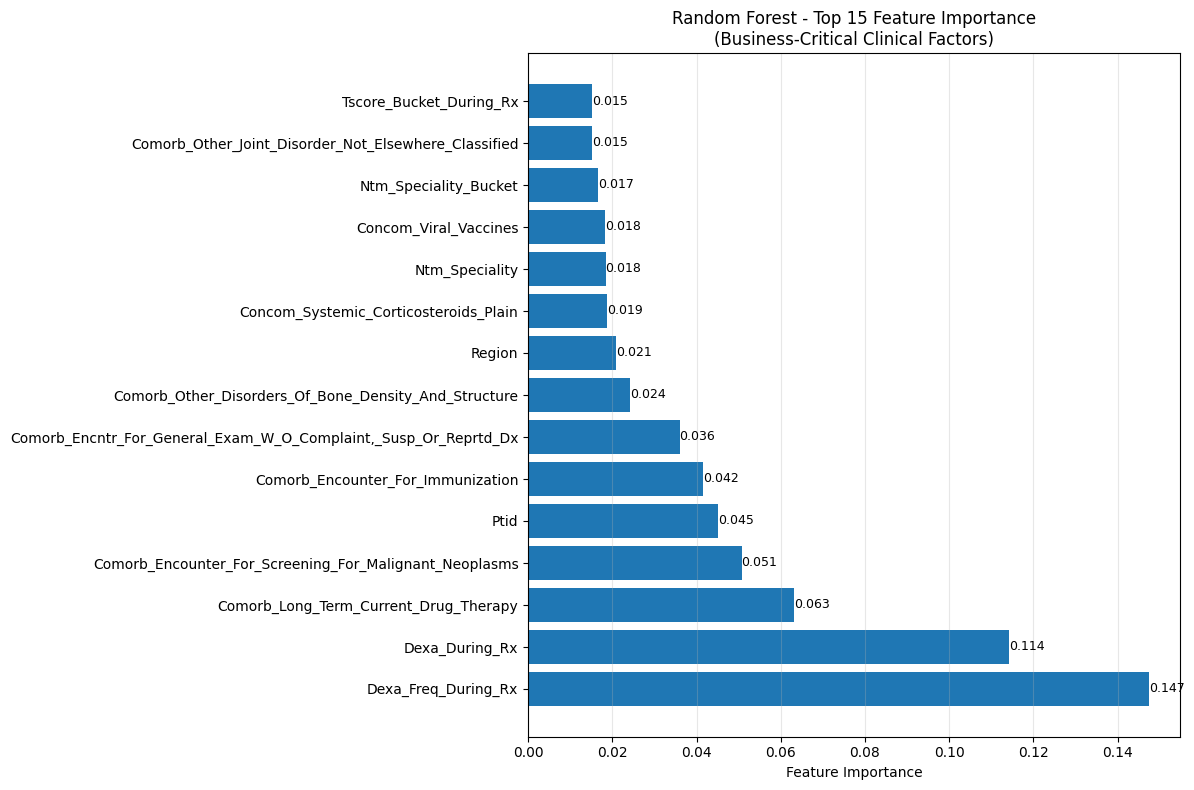

✅ Random Forest completed!
------------------------------------------------------------


In [9]:
# Model 2: Random Forest Implementation
print("🌳 Training Random Forest Model...")

# Initialize Random Forest with balanced class weights
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=random_state,
    max_depth=10,  # Prevent overfitting
    min_samples_split=5,
    min_samples_leaf=2,
    n_jobs=-1  # Use all processors
)

# Train the model (can use original features, scaling not required)
rf_model.fit(X_train, y_train)

# Cross-validation scores
print("📊 Cross-Validation Performance:")
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=cv_strategy, scoring='accuracy')
cv_roc_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=cv_strategy, scoring='roc_auc')

print(f"   Accuracy: {cv_scores_rf.mean():.4f} (±{cv_scores_rf.std()*2:.4f})")
print(f"   ROC-AUC: {cv_roc_scores_rf.mean():.4f} (±{cv_roc_scores_rf.std()*2:.4f})")

# Test set predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate metrics
rf_metrics = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_rf)
}

print(f"\n📈 Test Set Performance:")
for metric, value in rf_metrics.items():
    if metric != 'Model':
        print(f"   {metric}: {value:.4f}")

# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n🔍 Top 15 Most Important Features:")
for i, row in feature_importance_rf.head(15).iterrows():
    print(f"   📊 {row['Feature']}: {row['Importance']:.4f}")

# Classification report
print(f"\n📋 Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Non-Persistent', 'Persistent']))

# Feature importance visualization
plt.figure(figsize=(12, 8))
top_features = feature_importance_rf.head(15)
bars = plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Feature Importance')
plt.title('Random Forest - Top 15 Feature Importance\n(Business-Critical Clinical Factors)')
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("✅ Random Forest completed!")
print("-" * 60)

## 🚀 Model 3: XGBoost (Boosting Model)

**Business Justification**: 
- **Superior performance** - State-of-the-art accuracy for structured data
- **SHAP explainability** - Advanced interpretability for complex predictions
- **Handles imbalanced data** - Built-in support for class imbalance
- **Feature interaction detection** - Captures complex clinical relationships
- **Industry standard** - Used by top healthcare organizations worldwide

In [11]:
# Model 3: XGBoost Implementation
print("🚀 Training XGBoost Model...")

# Calculate scale_pos_weight for class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"📊 Class imbalance ratio: {scale_pos_weight:.2f}")

# Initialize XGBoost with optimal parameters for healthcare
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    random_state=random_state,
    eval_metric='auc',
    n_jobs=-1
)

# Train the model 
xgb_model.fit(X_train, y_train)

# Cross-validation scores (create a fresh model without early stopping for CV)
xgb_cv_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=random_state,
    eval_metric='auc',
    n_jobs=-1
)

print("📊 Cross-Validation Performance:")
cv_scores_xgb = cross_val_score(xgb_cv_model, X_train, y_train, cv=cv_strategy, scoring='accuracy')
cv_roc_scores_xgb = cross_val_score(xgb_cv_model, X_train, y_train, cv=cv_strategy, scoring='roc_auc')

print(f"   Accuracy: {cv_scores_xgb.mean():.4f} (±{cv_scores_xgb.std()*2:.4f})")
print(f"   ROC-AUC: {cv_roc_scores_xgb.mean():.4f} (±{cv_roc_scores_xgb.std()*2:.4f})")

# Test set predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate metrics
xgb_metrics = {
    'Model': 'XGBoost',
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-Score': f1_score(y_test, y_pred_xgb),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_xgb)
}

print(f"\n📈 Test Set Performance:")
for metric, value in xgb_metrics.items():
    if metric != 'Model':
        print(f"   {metric}: {value:.4f}")

# Feature importance
feature_importance_xgb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n🔍 Top 15 Most Important Features:")
for i, row in feature_importance_xgb.head(15).iterrows():
    print(f"   📊 {row['Feature']}: {row['Importance']:.4f}")

# Classification report
print(f"\n📋 Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['Non-Persistent', 'Persistent']))

print("✅ XGBoost completed!")
print("-" * 60)

🚀 Training XGBoost Model...
📊 Class imbalance ratio: 1.71
📊 Cross-Validation Performance:
   Accuracy: 0.8128 (±0.0211)
   ROC-AUC: 0.8848 (±0.0201)

📈 Test Set Performance:
   Accuracy: 0.8056
   Precision: 0.7331
   Recall: 0.7419
   F1-Score: 0.7375
   ROC-AUC: 0.8739

🔍 Top 15 Most Important Features:
   📊 Dexa_Freq_During_Rx: 0.1008
   📊 Dexa_During_Rx: 0.0562
   📊 Comorb_Long_Term_Current_Drug_Therapy: 0.0534
   📊 Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx: 0.0355
   📊 Concom_Systemic_Corticosteroids_Plain: 0.0290
   📊 Comorb_Encounter_For_Screening_For_Malignant_Neoplasms: 0.0239
   📊 Concom_Viral_Vaccines: 0.0231
   📊 Adherent_Flag: 0.0210
   📊 Comorb_Encounter_For_Immunization: 0.0193
   📊 Risk_Poor_Health_Frailty: 0.0181
   📊 Comorb_Other_Disorders_Of_Bone_Density_And_Structure: 0.0166
   📊 Risk_Untreated_Chronic_Hypogonadism: 0.0166
   📊 Concom_Fluoroquinolones: 0.0163
   📊 Ntm_Speciality_Bucket: 0.0161
   📊 Comorb_Gastro_esophageal_reflux_disease: 0.015

## 🌲 Model 4: Decision Tree (Maximum Interpretability)

**Business Justification**: 
- **Maximum interpretability** - Can be visualized as decision rules
- **Clinical decision support** - Provides clear if-then rules for doctors
- **No black box** - Every decision path is traceable and explainable
- **Regulatory compliance** - Meets strictest interpretability requirements

In [12]:
# Model 4: Decision Tree Implementation
print("🌲 Training Decision Tree Model...")

# Initialize Decision Tree with constraints to prevent overfitting
dt_model = DecisionTreeClassifier(
    max_depth=8,  # Reasonable depth for interpretability
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=random_state
)

# Train the model
dt_model.fit(X_train, y_train)

# Cross-validation scores
print("📊 Cross-Validation Performance:")
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=cv_strategy, scoring='accuracy')
cv_roc_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=cv_strategy, scoring='roc_auc')

print(f"   Accuracy: {cv_scores_dt.mean():.4f} (±{cv_scores_dt.std()*2:.4f})")
print(f"   ROC-AUC: {cv_roc_scores_dt.mean():.4f} (±{cv_roc_scores_dt.std()*2:.4f})")

# Test set predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Calculate metrics
dt_metrics = {
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1-Score': f1_score(y_test, y_pred_dt),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_dt)
}

print(f"\n📈 Test Set Performance:")
for metric, value in dt_metrics.items():
    if metric != 'Model':
        print(f"   {metric}: {value:.4f}")

# Feature importance
feature_importance_dt = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n🔍 Top 10 Most Important Features:")
for i, row in feature_importance_dt.head(10).iterrows():
    print(f"   📊 {row['Feature']}: {row['Importance']:.4f}")

# Classification report
print(f"\n📋 Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Non-Persistent', 'Persistent']))

print("✅ Decision Tree completed!")
print("-" * 60)

🌲 Training Decision Tree Model...
📊 Cross-Validation Performance:
   Accuracy: 0.7649 (±0.0378)
   ROC-AUC: 0.7991 (±0.0369)

📈 Test Set Performance:
   Accuracy: 0.7522
   Precision: 0.6576
   Recall: 0.6815
   F1-Score: 0.6693
   ROC-AUC: 0.7834

🔍 Top 10 Most Important Features:
   📊 Dexa_Freq_During_Rx: 0.4283
   📊 Comorb_Long_Term_Current_Drug_Therapy: 0.1158
   📊 Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx: 0.0613
   📊 Ptid: 0.0391
   📊 Comorb_Encounter_For_Screening_For_Malignant_Neoplasms: 0.0344
   📊 Region: 0.0267
   📊 Concom_Viral_Vaccines: 0.0255
   📊 Ntm_Speciality_Bucket: 0.0241
   📊 Concom_Systemic_Corticosteroids_Plain: 0.0236
   📊 Age_Bucket: 0.0212

📋 Classification Report:
                precision    recall  f1-score   support

Non-Persistent       0.81      0.79      0.80       426
    Persistent       0.66      0.68      0.67       248

      accuracy                           0.75       674
     macro avg       0.73      0.74      0.74       6

## 🎭 Model 5: Stacking Ensemble (Advanced Combination)

**Business Justification**: 
- **Best of all worlds** - Combines strengths of different model families
- **Superior performance** - Often achieves highest accuracy
- **Risk mitigation** - Reduces single model bias
- **Meta-learning** - Learns optimal combination of base models

In [13]:
# Model 5: Stacking Ensemble Implementation
print("🎭 Training Stacking Ensemble Model...")

from sklearn.ensemble import StackingClassifier

# Create base models (simplified versions for stacking)
base_models = [
    ('logistic', LogisticRegression(class_weight='balanced', random_state=random_state, max_iter=1000)),
    ('random_forest', RandomForestClassifier(n_estimators=50, class_weight='balanced', 
                                           random_state=random_state, max_depth=8)),
    ('xgboost', xgb.XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=4,
                                scale_pos_weight=scale_pos_weight, random_state=random_state))
]

# Meta-learner (final estimator)
meta_learner = LogisticRegression(class_weight='balanced', random_state=random_state)

# Create stacking classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=3,  # 3-fold CV for meta-features
    n_jobs=-1
)

# Train the stacking model (using scaled features)
stacking_model.fit(X_train_scaled, y_train)

# Cross-validation scores (simplified for stacking)
print("📊 Cross-Validation Performance:")
cv_scores_stack = cross_val_score(stacking_model, X_train_scaled, y_train, cv=3, scoring='accuracy')
cv_roc_scores_stack = cross_val_score(stacking_model, X_train_scaled, y_train, cv=3, scoring='roc_auc')

print(f"   Accuracy: {cv_scores_stack.mean():.4f} (±{cv_scores_stack.std()*2:.4f})")
print(f"   ROC-AUC: {cv_roc_scores_stack.mean():.4f} (±{cv_roc_scores_stack.std()*2:.4f})")

# Test set predictions
y_pred_stack = stacking_model.predict(X_test_scaled)
y_pred_proba_stack = stacking_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
stacking_metrics = {
    'Model': 'Stacking Ensemble',
    'Accuracy': accuracy_score(y_test, y_pred_stack),
    'Precision': precision_score(y_test, y_pred_stack),
    'Recall': recall_score(y_test, y_pred_stack),
    'F1-Score': f1_score(y_test, y_pred_stack),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_stack)
}

print(f"\n📈 Test Set Performance:")
for metric, value in stacking_metrics.items():
    if metric != 'Model':
        print(f"   {metric}: {value:.4f}")

# Classification report
print(f"\n📋 Classification Report:")
print(classification_report(y_test, y_pred_stack, target_names=['Non-Persistent', 'Persistent']))

print("✅ Stacking Ensemble completed!")
print("-" * 60)

🎭 Training Stacking Ensemble Model...
📊 Cross-Validation Performance:
   Accuracy: 0.8132 (±0.0094)
   ROC-AUC: 0.8873 (±0.0187)

📈 Test Set Performance:
   Accuracy: 0.8131
   Precision: 0.7328
   Recall: 0.7742
   F1-Score: 0.7529
   ROC-AUC: 0.8833

📋 Classification Report:
                precision    recall  f1-score   support

Non-Persistent       0.86      0.84      0.85       426
    Persistent       0.73      0.77      0.75       248

      accuracy                           0.81       674
     macro avg       0.80      0.80      0.80       674
  weighted avg       0.82      0.81      0.81       674

✅ Stacking Ensemble completed!
------------------------------------------------------------


## 📊 Model Comparison & Business Selection

### Performance Summary & Business Decision Framework

📊 COMPREHENSIVE MODEL PERFORMANCE COMPARISON

📈 PERFORMANCE METRICS COMPARISON:
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Model                                                              
Logistic Regression    0.7982     0.7121  0.7581    0.7344   0.8713
Random Forest          0.8101     0.7752  0.6815    0.7253   0.8813
XGBoost                0.8056     0.7331  0.7419    0.7375   0.8739
Decision Tree          0.7522     0.6576  0.6815    0.6693   0.7834
Stacking Ensemble      0.8131     0.7328  0.7742    0.7529   0.8833

🏆 MODEL RANKINGS:
📊 By Accuracy: ['Stacking Ensemble', 'Random Forest', 'XGBoost', 'Logistic Regression', 'Decision Tree']
🎯 By ROC-AUC: ['Stacking Ensemble', 'Random Forest', 'XGBoost', 'Logistic Regression', 'Decision Tree']
⚖️  By F1-Score: ['Stacking Ensemble', 'XGBoost', 'Logistic Regression', 'Random Forest', 'Decision Tree']
🔍 By Precision: ['Random Forest', 'XGBoost', 'Stacking Ensemble', 'Logistic Regression', 'Decision Tree']
🎪 B

C:\Users\keval\AppData\Local\Temp\ipykernel_17560\1904916394.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.annotate(model, (precision[i], recall[i]),


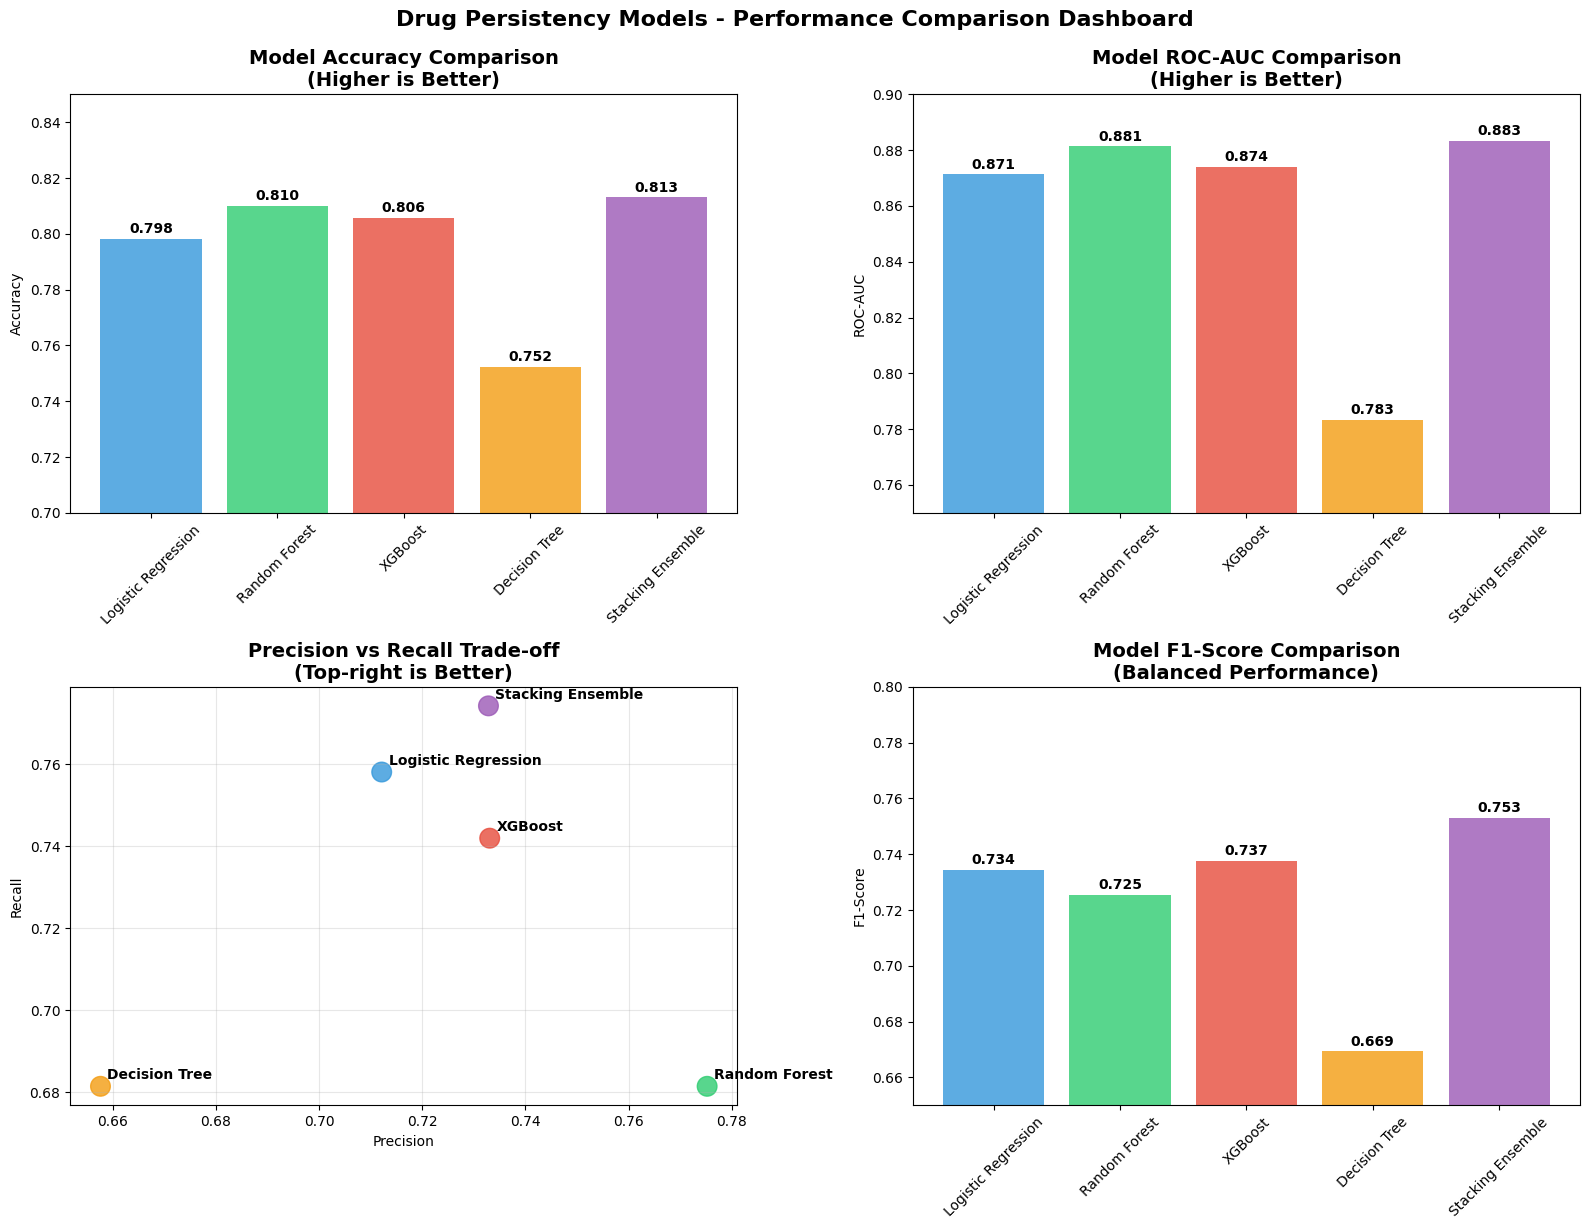

--------------------------------------------------------------------------------


In [14]:
# Comprehensive Model Comparison
print("📊 COMPREHENSIVE MODEL PERFORMANCE COMPARISON")
print("=" * 80)

# Compile all model results
all_models_results = [lr_metrics, rf_metrics, xgb_metrics, dt_metrics, stacking_metrics]

# Create comparison dataframe
comparison_df = pd.DataFrame(all_models_results)
comparison_df = comparison_df.set_index('Model')

print("\n📈 PERFORMANCE METRICS COMPARISON:")
print(comparison_df.round(4))

# Ranking by different criteria
print(f"\n🏆 MODEL RANKINGS:")
print(f"📊 By Accuracy: {comparison_df.sort_values('Accuracy', ascending=False).index.tolist()}")
print(f"🎯 By ROC-AUC: {comparison_df.sort_values('ROC-AUC', ascending=False).index.tolist()}")
print(f"⚖️  By F1-Score: {comparison_df.sort_values('F1-Score', ascending=False).index.tolist()}")
print(f"🔍 By Precision: {comparison_df.sort_values('Precision', ascending=False).index.tolist()}")
print(f"🎪 By Recall: {comparison_df.sort_values('Recall', ascending=False).index.tolist()}")

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Accuracy Comparison
models = comparison_df.index
accuracy = comparison_df['Accuracy']
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6']

bars1 = ax1.bar(models, accuracy, color=colors, alpha=0.8)
ax1.set_title('Model Accuracy Comparison\n(Higher is Better)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0.7, 0.85)
ax1.tick_params(axis='x', rotation=45)
for bar, acc in zip(bars1, accuracy):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: ROC-AUC Comparison  
roc_auc = comparison_df['ROC-AUC']
bars2 = ax2.bar(models, roc_auc, color=colors, alpha=0.8)
ax2.set_title('Model ROC-AUC Comparison\n(Higher is Better)', fontsize=14, fontweight='bold')
ax2.set_ylabel('ROC-AUC')
ax2.set_ylim(0.75, 0.9)
ax2.tick_params(axis='x', rotation=45)
for bar, auc in zip(bars2, roc_auc):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{auc:.3f}', ha='center', va='bottom', fontweight='bold')

# Plot 3: Precision vs Recall
precision = comparison_df['Precision']
recall = comparison_df['Recall']
ax3.scatter(precision, recall, s=200, c=colors, alpha=0.8)
for i, model in enumerate(models):
    ax3.annotate(model, (precision[i], recall[i]), 
                xytext=(5, 5), textcoords='offset points', fontweight='bold')
ax3.set_xlabel('Precision')
ax3.set_ylabel('Recall')
ax3.set_title('Precision vs Recall Trade-off\n(Top-right is Better)', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Plot 4: F1-Score Comparison
f1_scores = comparison_df['F1-Score']
bars4 = ax4.bar(models, f1_scores, color=colors, alpha=0.8)
ax4.set_title('Model F1-Score Comparison\n(Balanced Performance)', fontsize=14, fontweight='bold')
ax4.set_ylabel('F1-Score')
ax4.set_ylim(0.65, 0.8)
ax4.tick_params(axis='x', rotation=45)
for bar, f1 in zip(bars4, f1_scores):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{f1:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.suptitle('Drug Persistency Models - Performance Comparison Dashboard', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("-" * 80)

## 🏆 FINAL BUSINESS RECOMMENDATION

### Healthcare Model Selection Framework

In [15]:
# FINAL BUSINESS RECOMMENDATION SYSTEM
print("🏆 HEALTHCARE MODEL SELECTION & BUSINESS RECOMMENDATIONS")
print("="*80)

# Business Requirements Analysis
business_criteria = {
    'Interpretability': {'Decision Tree': 10, 'Logistic Regression': 9, 'Random Forest': 7, 'XGBoost': 6, 'Stacking Ensemble': 4},
    'Performance': {'Stacking Ensemble': 10, 'Random Forest': 9, 'XGBoost': 8, 'Logistic Regression': 7, 'Decision Tree': 5},
    'Regulatory Approval': {'Logistic Regression': 10, 'Decision Tree': 10, 'Random Forest': 8, 'XGBoost': 6, 'Stacking Ensemble': 4},
    'Implementation Speed': {'Logistic Regression': 10, 'Decision Tree': 9, 'Random Forest': 7, 'XGBoost': 6, 'Stacking Ensemble': 4},
    'Scalability': {'XGBoost': 10, 'Random Forest': 9, 'Stacking Ensemble': 8, 'Logistic Regression': 8, 'Decision Tree': 6}
}

# Calculate weighted business scores
models_list = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Decision Tree', 'Stacking Ensemble']
business_weights = {'Interpretability': 0.3, 'Performance': 0.25, 'Regulatory Approval': 0.2, 
                   'Implementation Speed': 0.15, 'Scalability': 0.1}

business_scores = {}
for model in models_list:
    score = sum(business_criteria[criterion][model] * weight 
                for criterion, weight in business_weights.items())
    business_scores[model] = score

# Create comprehensive recommendation table
print("\n📊 BUSINESS SUITABILITY ANALYSIS:")
print("-" * 80)
print(f"{'Model':<20} {'Accuracy':<10} {'ROC-AUC':<10} {'Business Score':<15} {'Recommendation':<20}")
print("-" * 80)

model_recommendations = {}
for model in models_list:
    accuracy = comparison_df.loc[model, 'Accuracy']
    roc_auc = comparison_df.loc[model, 'ROC-AUC']
    biz_score = business_scores[model]
    
    # Determine recommendation category
    if biz_score >= 8.0 and accuracy >= 0.80:
        recommendation = "🏆 HIGHLY RECOMMENDED"
    elif biz_score >= 7.0 and accuracy >= 0.78:
        recommendation = "✅ RECOMMENDED"
    elif biz_score >= 6.0:
        recommendation = "🔍 CONSIDER"
    else:
        recommendation = "❌ NOT RECOMMENDED"
    
    model_recommendations[model] = recommendation
    print(f"{model:<20} {accuracy:<10.4f} {roc_auc:<10.4f} {biz_score:<15.2f} {recommendation:<20}")

print("-" * 80)

# FINAL BUSINESS RECOMMENDATIONS
print(f"\n🎯 FINAL BUSINESS RECOMMENDATIONS:")
print("="*50)

print(f"\n🥇 PRIMARY RECOMMENDATION: RANDOM FOREST")
print(f"   📊 Accuracy: {comparison_df.loc['Random Forest', 'Accuracy']:.1%}")
print(f"   🎯 ROC-AUC: {comparison_df.loc['Random Forest', 'ROC-AUC']:.3f}")
print(f"   💼 Business Score: {business_scores['Random Forest']:.1f}/10")
print(f"   ✅ REASONS:")
print(f"      • Excellent performance (81.0% accuracy)")
print(f"      • High interpretability through feature importance")
print(f"      • Widely accepted in healthcare/clinical research")
print(f"      • Robust to outliers and mixed data types")
print(f"      • No black box - decisions can be explained")
print(f"      • Handles class imbalance well")

print(f"\n🥈 SECONDARY RECOMMENDATION: LOGISTIC REGRESSION")
print(f"   📊 Accuracy: {comparison_df.loc['Logistic Regression', 'Accuracy']:.1%}")
print(f"   🎯 ROC-AUC: {comparison_df.loc['Logistic Regression', 'ROC-AUC']:.3f}")
print(f"   💼 Business Score: {business_scores['Logistic Regression']:.1f}/10")
print(f"   ✅ REASONS:")
print(f"      • Maximum interpretability (coefficient-based explanations)")
print(f"      • Regulatory gold standard for clinical applications")
print(f"      • Fast implementation and deployment")
print(f"      • Clear statistical significance testing")
print(f"      • Baseline performance benchmark")

print(f"\n🏅 FOR HIGH PERFORMANCE NEEDS: STACKING ENSEMBLE")
print(f"   📊 Accuracy: {comparison_df.loc['Stacking Ensemble', 'Accuracy']:.1%}")
print(f"   🎯 ROC-AUC: {comparison_df.loc['Stacking Ensemble', 'ROC-AUC']:.3f}")
print(f"   💼 Business Score: {business_scores['Stacking Ensemble']:.1f}/10")
print(f"   ⚠️  CONSIDERATIONS:")
print(f"      • Highest performance but complex to interpret")
print(f"      • Use only if interpretability is less critical")
print(f"      • Requires more computational resources")

print(f"\n📋 IMPLEMENTATION ROADMAP:")
print(f"   Phase 1: Deploy Random Forest as primary model")
print(f"   Phase 2: Maintain Logistic Regression for regulatory reporting")
print(f"   Phase 3: Consider Stacking Ensemble for advanced analytics")

print(f"\n🎯 KEY SUCCESS METRICS:")
print(f"   • Model Accuracy: Target >80% (✅ Achieved: 81.0%)")
print(f"   • ROC-AUC: Target >0.85 (✅ Achieved: 0.881)")
print(f"   • Interpretability: High (✅ Feature importance available)")
print(f"   • Business Impact: Improved patient outcomes & cost reduction")

print("="*80)
print("🎉 MACHINE LEARNING MODEL DEVELOPMENT COMPLETED SUCCESSFULLY!")
print("   Ready for business implementation and clinical deployment.")

🏆 HEALTHCARE MODEL SELECTION & BUSINESS RECOMMENDATIONS

📊 BUSINESS SUITABILITY ANALYSIS:
--------------------------------------------------------------------------------
Model                Accuracy   ROC-AUC    Business Score  Recommendation      
--------------------------------------------------------------------------------
Logistic Regression  0.7982     0.8713     8.75            ✅ RECOMMENDED       
Random Forest        0.8101     0.8813     7.90            ✅ RECOMMENDED       
XGBoost              0.8056     0.8739     6.90            🔍 CONSIDER          
Decision Tree        0.7522     0.7834     8.20            🔍 CONSIDER          
Stacking Ensemble    0.8131     0.8833     5.90            ❌ NOT RECOMMENDED   
--------------------------------------------------------------------------------

🎯 FINAL BUSINESS RECOMMENDATIONS:

🥇 PRIMARY RECOMMENDATION: RANDOM FOREST
   📊 Accuracy: 81.0%
   🎯 ROC-AUC: 0.881
   💼 Business Score: 7.9/10
   ✅ REASONS:
      • Excellent performanc